In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/space_titanic2_train.csv')
df1

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,Europa,False,TRAPPIST-1e,False,False,B,P,30.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,False,True,F,S,20.0,1.0,1.0,1.0,1.0,1.0
2,Europa,False,TRAPPIST-1e,True,False,A,S,50.0,1.0,1.0,0.0,1.0,1.0
3,Europa,False,TRAPPIST-1e,False,False,A,S,30.0,0.0,1.0,1.0,1.0,1.0
4,Earth,False,TRAPPIST-1e,False,True,F,S,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,False,A,P,40.0,0.0,1.0,0.0,1.0,1.0
8689,Earth,True,PSO J318.5-22,False,False,G,S,10.0,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,False,True,G,S,20.0,0.0,0.0,1.0,1.0,0.0
8691,Europa,False,55 Cancri e,False,False,E,S,30.0,0.0,1.0,0.0,1.0,1.0


In [3]:
df2 = pd.read_csv('data/space_titanic2_test.csv')
df2

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,Earth,True,TRAPPIST-1e,False,NaN,G,S,20.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,False,NaN,F,S,10.0,0.0,1.0,0.0,1.0,0.0
2,Europa,True,55 Cancri e,False,NaN,C,S,30.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,False,NaN,C,S,30.0,0.0,1.0,0.0,1.0,1.0
4,Earth,False,TRAPPIST-1e,False,NaN,F,S,20.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,NaN,G,S,30.0,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,TRAPPIST-1e,False,NaN,G,M,40.0,0.0,1.0,1.0,1.0,1.0
4274,Mars,True,55 Cancri e,False,NaN,D,P,20.0,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,TRAPPIST-1e,False,NaN,D,P,20.0,0.0,1.0,0.0,0.0,1.0


### 전처리

In [4]:
# 두 데이터 프레임을 합친다.
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)
total_df

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,Europa,False,TRAPPIST-1e,False,0.0,B,P,30.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,False,1.0,F,S,20.0,1.0,1.0,1.0,1.0,1.0
2,Europa,False,TRAPPIST-1e,True,0.0,A,S,50.0,1.0,1.0,0.0,1.0,1.0
3,Europa,False,TRAPPIST-1e,False,0.0,A,S,30.0,0.0,1.0,1.0,1.0,1.0
4,Earth,False,TRAPPIST-1e,False,1.0,F,S,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,False,NaN,G,S,30.0,0.0,0.0,0.0,0.0,0.0
12966,Earth,False,TRAPPIST-1e,False,NaN,G,M,40.0,0.0,1.0,1.0,1.0,1.0
12967,Mars,True,55 Cancri e,False,NaN,D,P,20.0,0.0,0.0,0.0,0.0,0.0
12968,Europa,False,TRAPPIST-1e,False,NaN,D,P,20.0,0.0,1.0,0.0,0.0,1.0


In [5]:
# encoding
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()

encoder1.fit(total_df['HomePlanet'])
encoder2.fit(total_df['CryoSleep'])
encoder3.fit(total_df['Destination'])
encoder4.fit(total_df['VIP'])
encoder5.fit(total_df['Deck'])
encoder6.fit(total_df['CabinSide'])

total_df['HomePlanet'] = encoder1.transform(total_df['HomePlanet'])
total_df['CryoSleep'] = encoder2.transform(total_df['CryoSleep'])
total_df['Destination'] = encoder3.transform(total_df['Destination'])
total_df['VIP'] = encoder4.transform(total_df['VIP'])
total_df['Deck'] = encoder5.transform(total_df['Deck'])
total_df['CabinSide'] = encoder6.transform(total_df['CabinSide'])

total_df

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,1,0,2,0,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0
2,1,0,2,1,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0
3,1,0,2,0,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0,0,2,0,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,1,2,0,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0,0,2,0,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,2,1,0,0,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,1,0,2,0,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0


In [6]:
# 데이터 프레임을 복제한다.
temp = total_df.copy()

In [7]:
# HomePlanet 값을 도착 확율로 변환한다.
temp['HomePlanet'] = temp.groupby('HomePlanet')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0,2,0,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0,2,0,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0,2,1,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0,2,0,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0,2,0,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,1,2,0,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0,2,0,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,1,0,0,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0,2,0,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0


In [8]:
# CryoSleep 값을 도착 확율로 변환한다.
temp['CryoSleep'] = temp.groupby('CryoSleep')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,2,0,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,2,0,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,2,1,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,2,0,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,2,0,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,2,0,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,2,0,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0,0,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,2,0,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0


In [9]:
# Destination 값을 도착 확율로 변환한다.
temp['Destination'] = temp.groupby('Destination')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,1,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0


In [10]:
# VIP 값을 도착 확율로 변환한다.
temp['VIP'] = temp.groupby('VIP')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0


In [11]:
# Deck 값을 도착 확율로 변환한다.
temp['Deck'] = temp.groupby('Deck')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,1,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,2,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,2,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,2,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,2,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,2,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,1,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,1,20.0,0.0,1.0,0.0,0.0,1.0


In [12]:
# CabinSide 값을 도착 확율로 변환한다.
temp['CabinSide'] = temp.groupby('CabinSide')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,30.0,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,20.0,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,50.0,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,30.0,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,10.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,30.0,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,40.0,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,20.0,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,20.0,0.0,1.0,0.0,0.0,1.0


In [13]:
# Age2 값을 도착 확율로 변환한다.
temp['Age2'] = temp.groupby('Age2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.0,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,1.0,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,1.0,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.0,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.0,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.0,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.0,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.0,1.0,0.0,0.0,1.0


In [14]:
# RoomService2 값을 도착 확율로 변환한다.
temp['RoomService2'] = temp.groupby('RoomService2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.0,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,1.0,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,1.0,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,1.0,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.0,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,1.0,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.0,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,1.0,0.0,0.0,1.0


In [15]:
# FoodCourt2 값을 도착 확율로 변환한다.
temp['FoodCourt2'] = temp.groupby('FoodCourt2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.589289,0.0,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,0.345449,1.0,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,0.345449,0.0,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,0.345449,1.0,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,0.345449,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.589289,0.0,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,0.345449,1.0,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.589289,0.0,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.345449,0.0,0.0,1.0


In [16]:
# ShoppingMall2 값을 도착 확율로 변환한다.
temp['ShoppingMall2'] = temp.groupby('ShoppingMall2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.589289,0.596894,0.0,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,0.345449,0.317115,1.0,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,0.345449,0.596894,1.0,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,0.345449,0.317115,1.0,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,0.345449,0.317115,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.589289,0.596894,0.0,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,0.345449,0.317115,1.0,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.589289,0.596894,0.0,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.345449,0.596894,0.0,1.0


In [17]:
# Spa2 값을 도착 확율로 변환한다.
temp['Spa2'] = temp.groupby('Spa2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.589289,0.596894,0.634465,0.0
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,0.345449,0.317115,0.277464,1.0
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,0.345449,0.596894,0.277464,1.0
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,0.345449,0.317115,0.277464,1.0
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,0.345449,0.317115,0.277464,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.589289,0.596894,0.634465,0.0
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,0.345449,0.317115,0.277464,1.0
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.589289,0.596894,0.634465,0.0
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.345449,0.596894,0.634465,1.0


In [18]:
# VRDeck2 값을 도착 확율로 변환한다.
temp['VRDeck2'] = temp.groupby('VRDeck2')['Transported'].transform('mean')
temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.589289,0.596894,0.634465,0.624494
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,0.345449,0.317115,0.277464,0.275415
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,0.345449,0.596894,0.277464,0.275415
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,0.345449,0.317115,0.277464,0.275415
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,0.345449,0.317115,0.277464,0.275415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.589289,0.596894,0.634465,0.624494
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,0.345449,0.317115,0.277464,0.275415
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.589289,0.596894,0.634465,0.624494
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.345449,0.596894,0.634465,0.275415


In [19]:
# 생존율을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = temp.mean(axis=1)
# 최대
temp['Max'] = temp.max(axis=1)
# 최소
temp['Min'] = temp.min(axis=1)
# 최대 - 최소
temp['Diff'] = temp['Max'] - temp['Min']

temp

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2,Mean,Max,Min,Diff
0,0.660037,0.335042,0.472199,0.506475,0.0,0.734275,0.451260,0.458525,0.627822,0.589289,0.596894,0.634465,0.624494,0.514675,0.734275,0.000000,0.734275
1,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.471429,0.259966,0.345449,0.317115,0.277464,0.275415,0.437457,1.000000,0.259966,0.740034
2,0.660037,0.335042,0.472199,0.381910,0.0,0.496094,0.555037,0.493716,0.259966,0.345449,0.596894,0.277464,0.275415,0.396094,0.660037,0.000000,0.660037
3,0.660037,0.335042,0.472199,0.506475,0.0,0.496094,0.555037,0.458525,0.627822,0.345449,0.317115,0.277464,0.275415,0.409744,0.660037,0.000000,0.660037
4,0.425635,0.335042,0.472199,0.506475,1.0,0.445716,0.555037,0.532792,0.259966,0.345449,0.317115,0.277464,0.275415,0.442177,1.000000,0.259966,0.740034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.425635,0.817583,0.472199,0.506475,NaN,0.511428,0.555037,0.458525,0.627822,0.589289,0.596894,0.634465,0.624494,0.568321,0.817583,0.425635,0.391949
12966,0.425635,0.335042,0.472199,0.506475,NaN,0.511428,0.502513,0.506679,0.627822,0.345449,0.317115,0.277464,0.275415,0.425270,0.627822,0.275415,0.352407
12967,0.522676,0.817583,0.610000,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.589289,0.596894,0.634465,0.624494,0.573787,0.817583,0.433054,0.384529
12968,0.660037,0.335042,0.472199,0.506475,NaN,0.433054,0.451260,0.471429,0.627822,0.345449,0.596894,0.634465,0.275415,0.484129,0.660037,0.275415,0.384622


In [20]:
# 구한 통계값을 원본에 담아준다.
total_df['Mean'] = temp['Mean']
total_df['Max'] = temp['Max']
total_df['Min'] = temp['Min']
total_df['Diff'] = temp['Diff']

total_df

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2,Mean,Max,Min,Diff
0,1,0,2,0,0.0,1,1,30.0,0.0,0.0,0.0,0.0,0.0,0.514675,0.734275,0.000000,0.734275
1,0,0,2,0,1.0,5,2,20.0,1.0,1.0,1.0,1.0,1.0,0.437457,1.000000,0.259966,0.740034
2,1,0,2,1,0.0,0,2,50.0,1.0,1.0,0.0,1.0,1.0,0.396094,0.660037,0.000000,0.660037
3,1,0,2,0,0.0,0,2,30.0,0.0,1.0,1.0,1.0,1.0,0.409744,0.660037,0.000000,0.660037
4,0,0,2,0,1.0,5,2,10.0,1.0,1.0,1.0,1.0,1.0,0.442177,1.000000,0.259966,0.740034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,1,2,0,NaN,6,2,30.0,0.0,0.0,0.0,0.0,0.0,0.568321,0.817583,0.425635,0.391949
12966,0,0,2,0,NaN,6,0,40.0,0.0,1.0,1.0,1.0,1.0,0.425270,0.627822,0.275415,0.352407
12967,2,1,0,0,NaN,3,1,20.0,0.0,0.0,0.0,0.0,0.0,0.573787,0.817583,0.433054,0.384529
12968,1,0,2,0,NaN,3,1,20.0,0.0,1.0,0.0,0.0,1.0,0.484129,0.660037,0.275415,0.384622


In [22]:
# StandardScaler
X1 = total_df.drop('Transported', axis=1)
scaler1 = StandardScaler()
scaler1.fit(X1)

StandardScaler()

In [23]:
# 학습과 예측데이터로 나눈다.
a1 = len(df1)

df10 = total_df.iloc[:a1]
df20 = total_df.iloc[a1:]

In [24]:
# 예측 데이터에서 Transported 컬럼을 제거한다.
df20.drop('Transported', axis=1, inplace=True)

In [25]:
# 학습데이터를 입력과 결과로 나눈다.
X = df10.drop('Transported', axis=1)
y = df10['Transported']

In [26]:
# 표준화
X = scaler1.transform(X)

### 기본 모델을 통한 교차 검증

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [28]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [29]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [30]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [31]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 1.0
LR 평균 성능 수치 : 1.0
SVM 평균 성능 수치 : 1.0
DT 평균 성능 수치 : 1.0
RF 평균 성능 수치 : 1.0
Ada 평균 성능 수치 : 1.0
GB 평균 성능 수치 : 1.0
LGBM 평균 성능 수치 : 1.0
XGB 평균 성능 수치 : 1.0


### 하이퍼 파라미터 튜닝

In [32]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [33]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [34]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 2}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 150}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 150}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
XGB
최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.0001, 'n_estimators

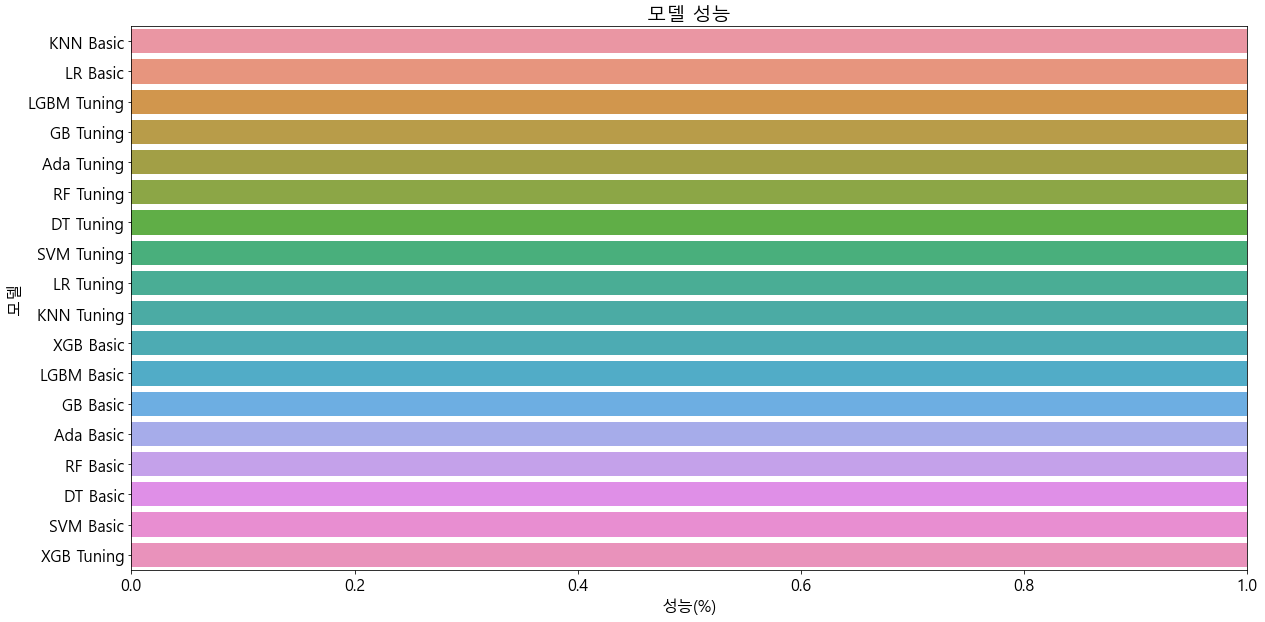

In [35]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 최종 평가를 수행한다.

In [36]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# 기본 모델과 튜닝된 모델이 담긴 리스트를 합친 새로운 리스트를 생성한다.
total_model = model_list + tuning_model

In [38]:
# 학습용 데이터를 학습한다.
for m1 in total_model :
    m1.fit(X_train, y_train)

In [39]:
# 학습용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_train)
    pred_list.append(pred)

In [40]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_train, p1)
    r2 = precision_score(y_train, p1)
    r3 = recall_score(y_train, p1)
    r4 = f1_score(y_train, p1)
    r5 = roc_auc_score(y_train, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

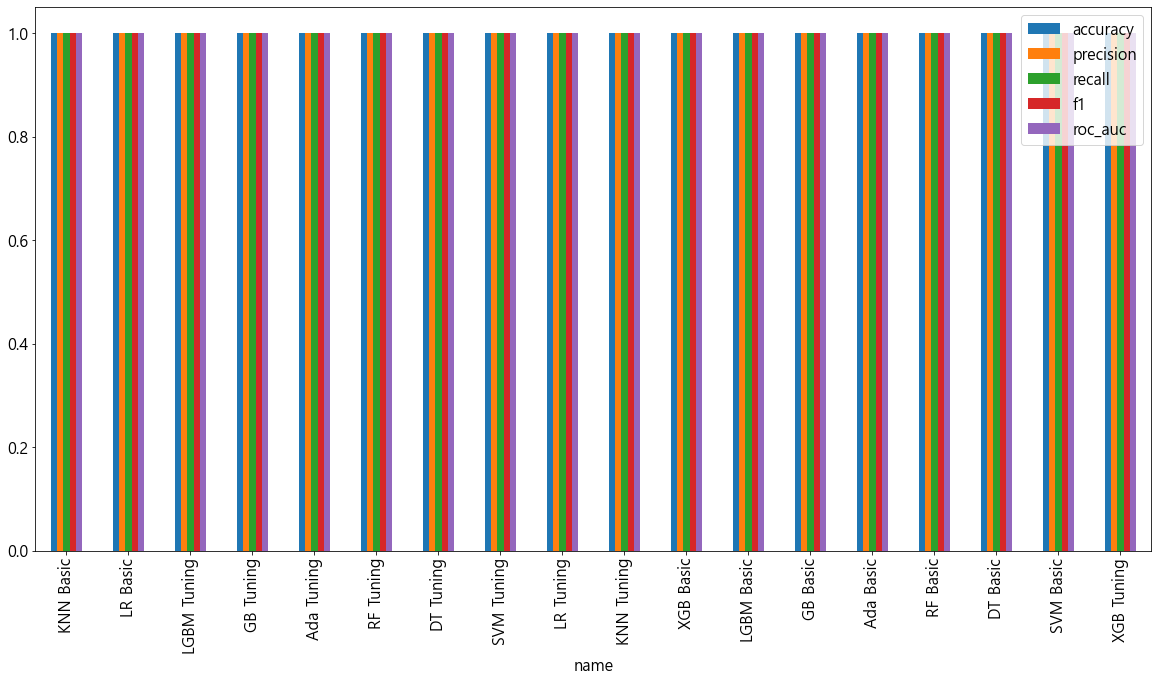

In [41]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

In [42]:
# 검증용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_test)
    pred_list.append(pred)

In [43]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_test, p1)
    r2 = precision_score(y_test, p1)
    r3 = recall_score(y_test, p1)
    r4 = f1_score(y_test, p1)
    r5 = roc_auc_score(y_test, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

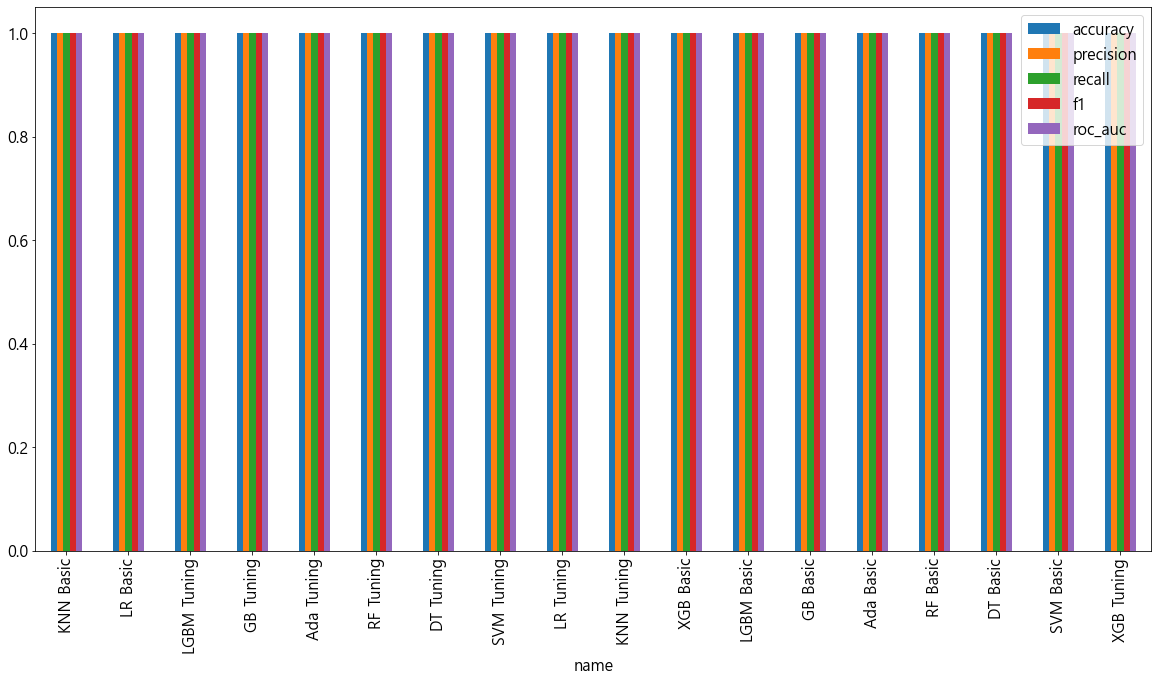

In [44]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

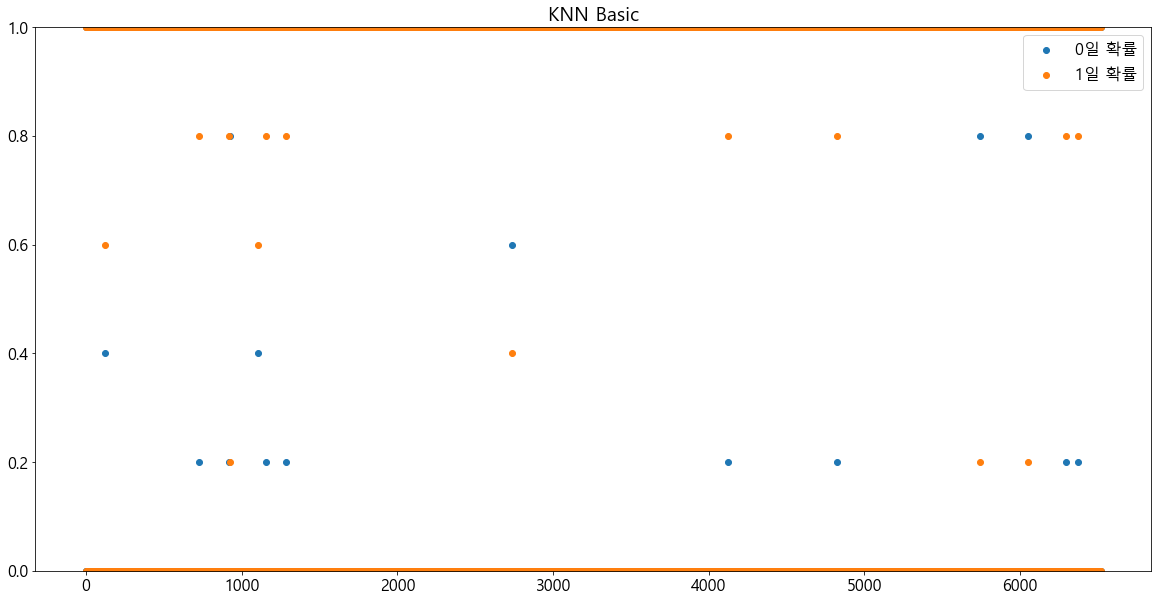

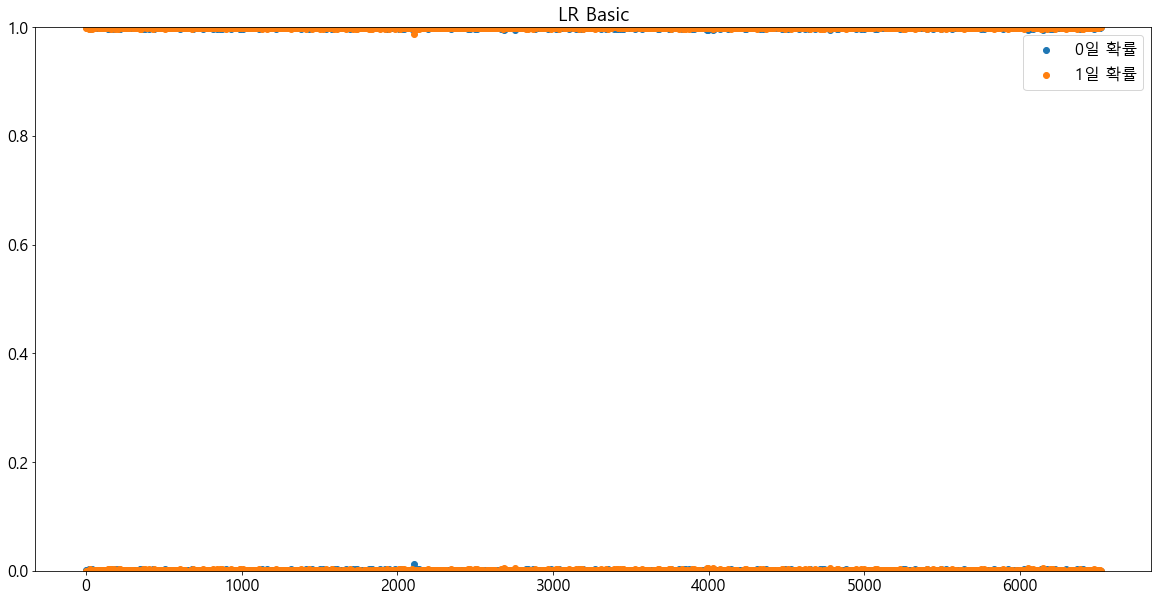

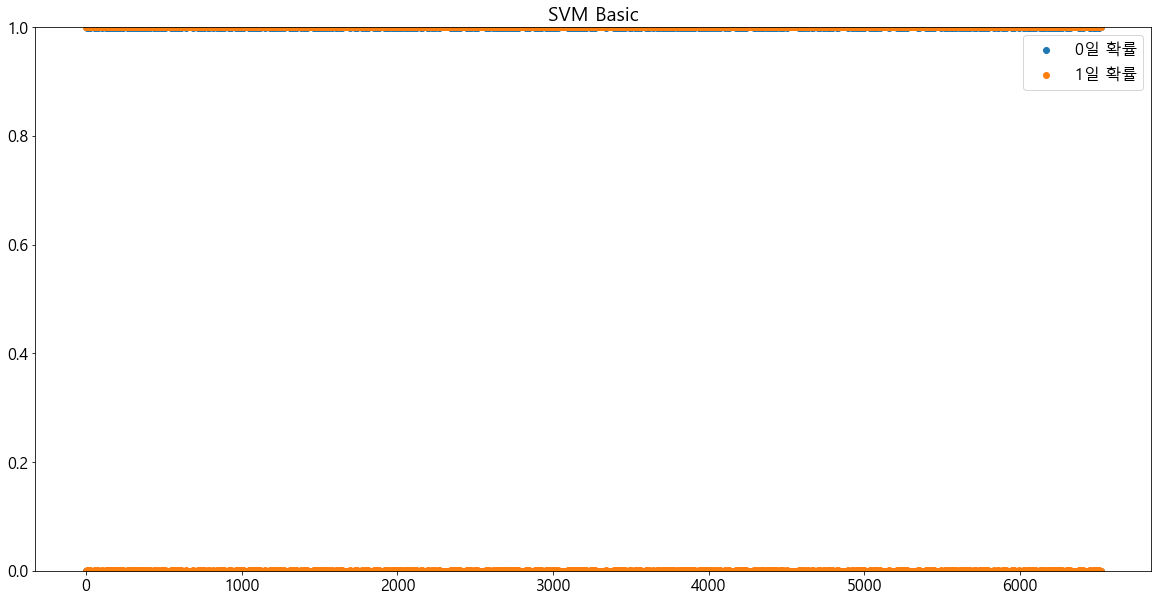

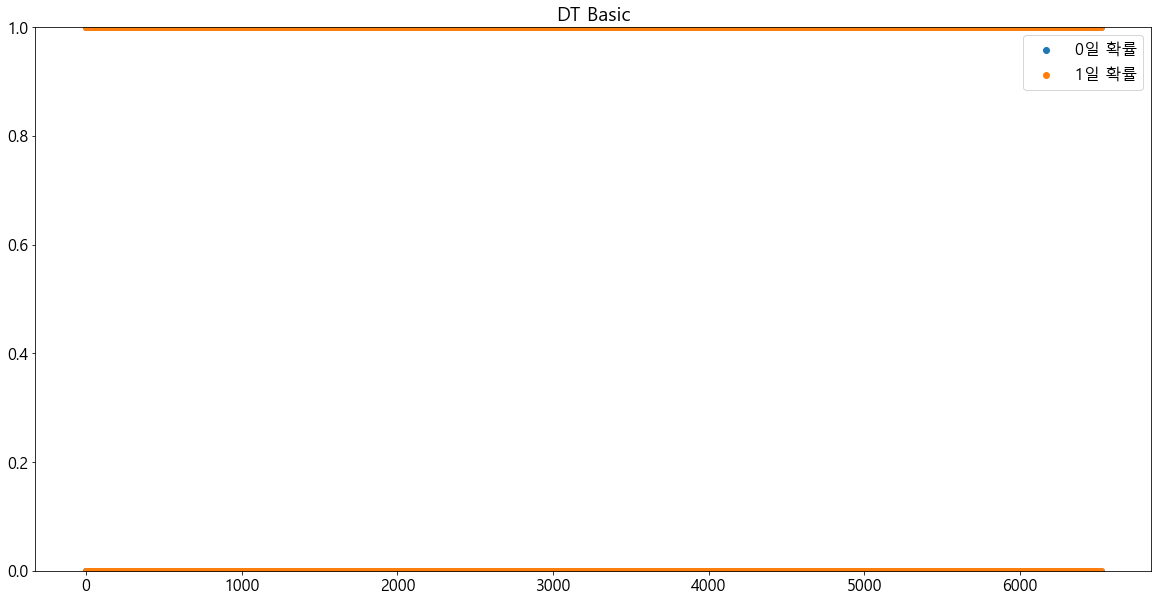

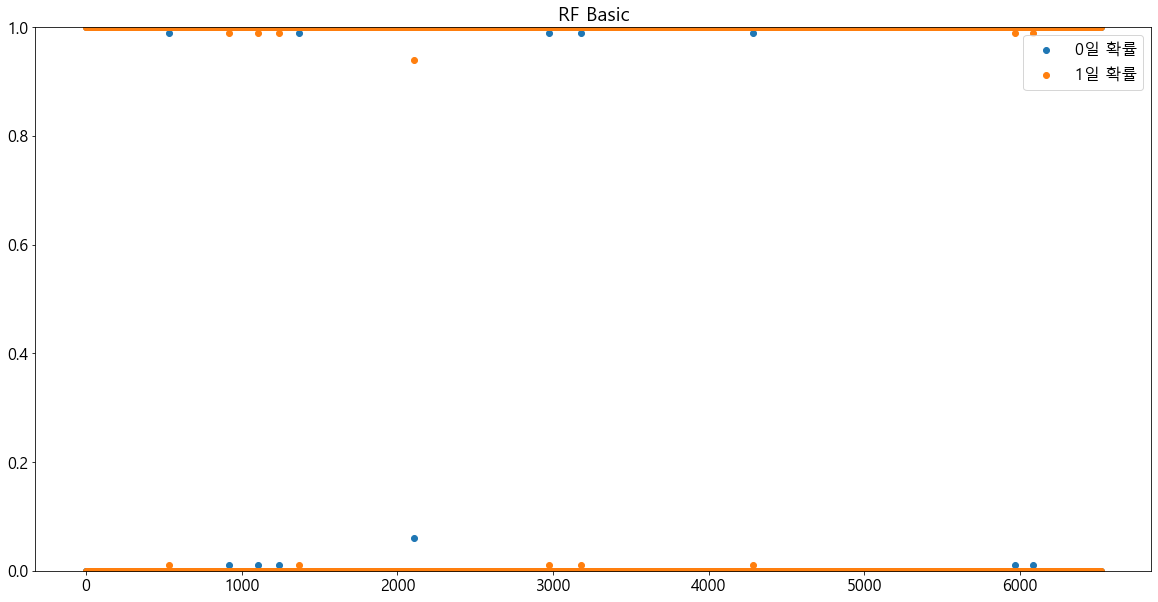

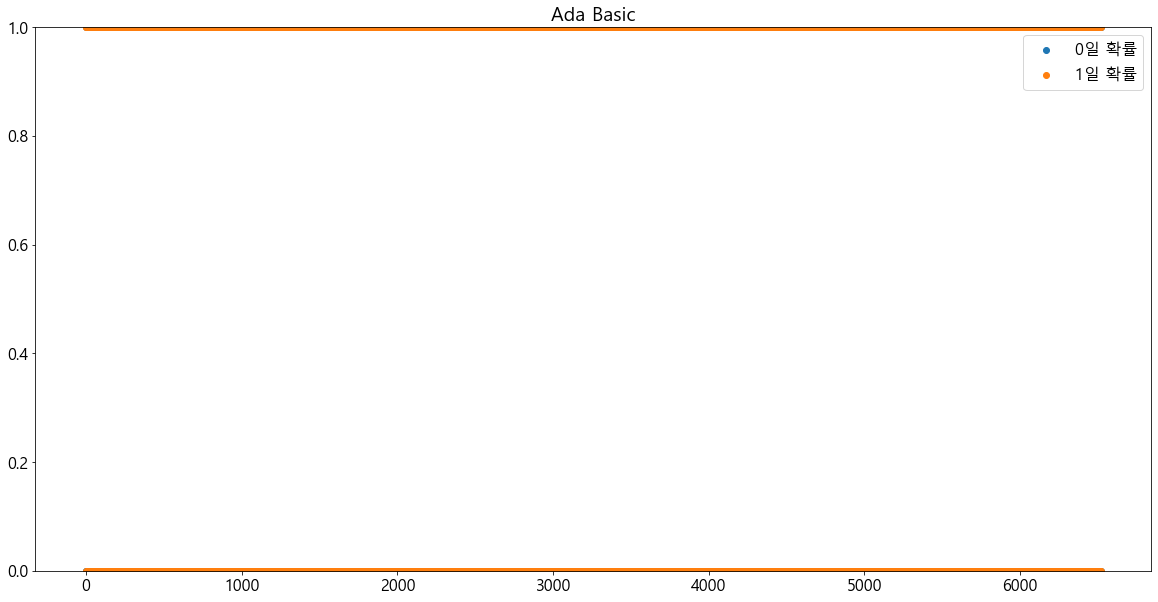

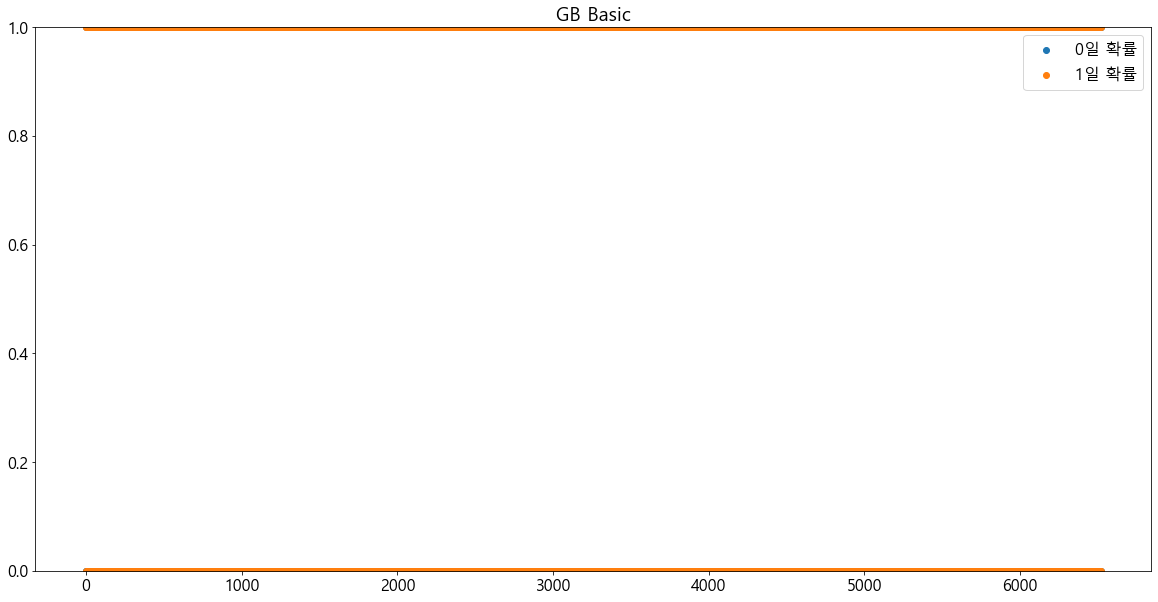

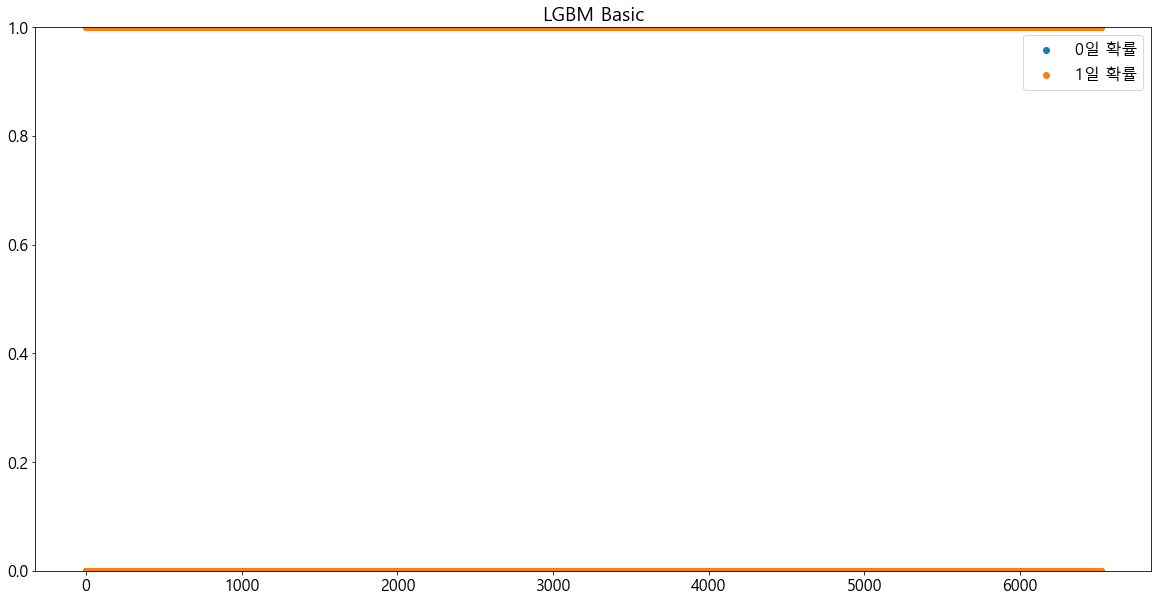

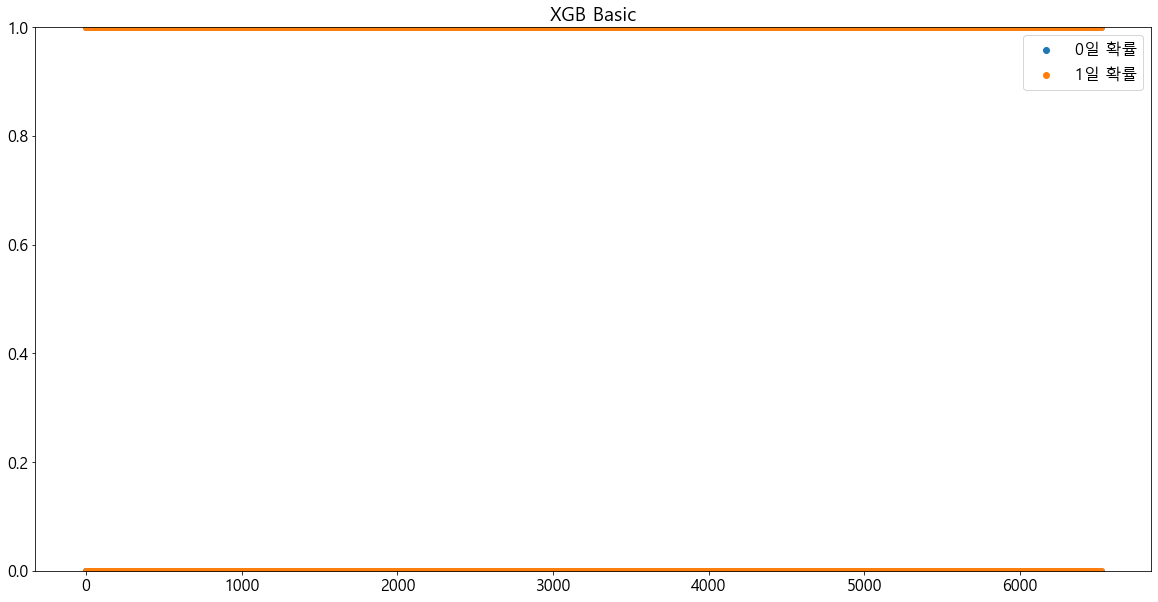

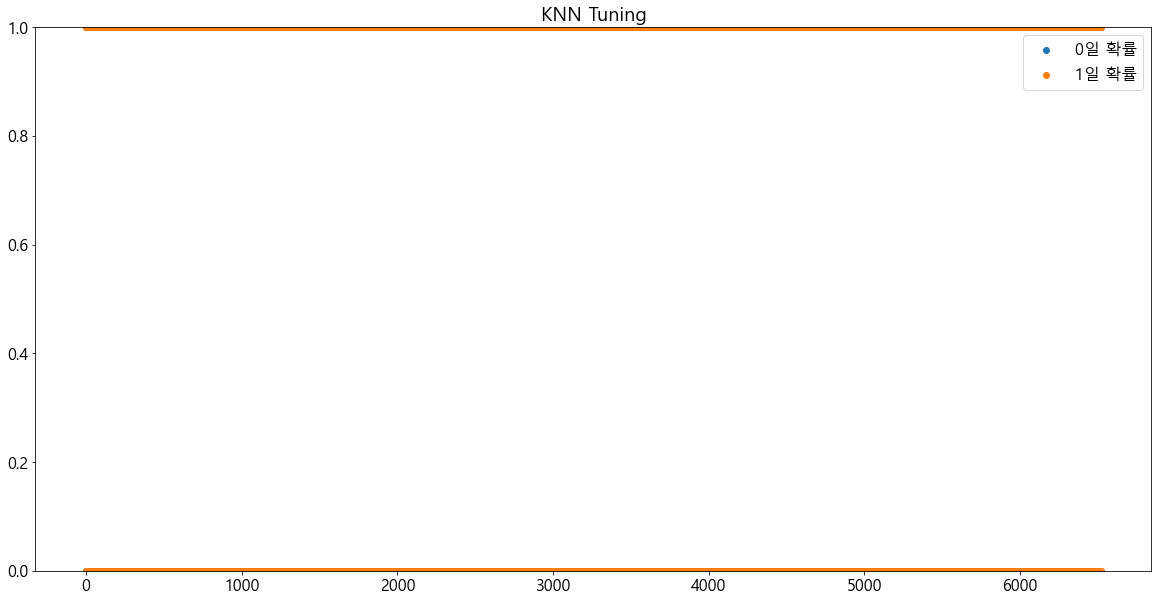

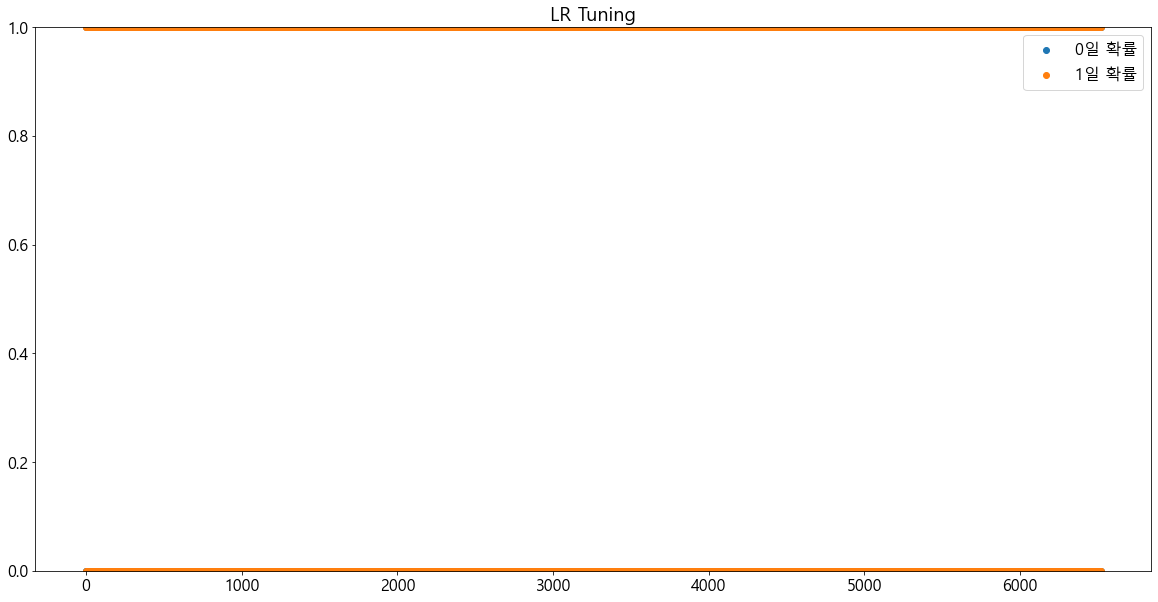

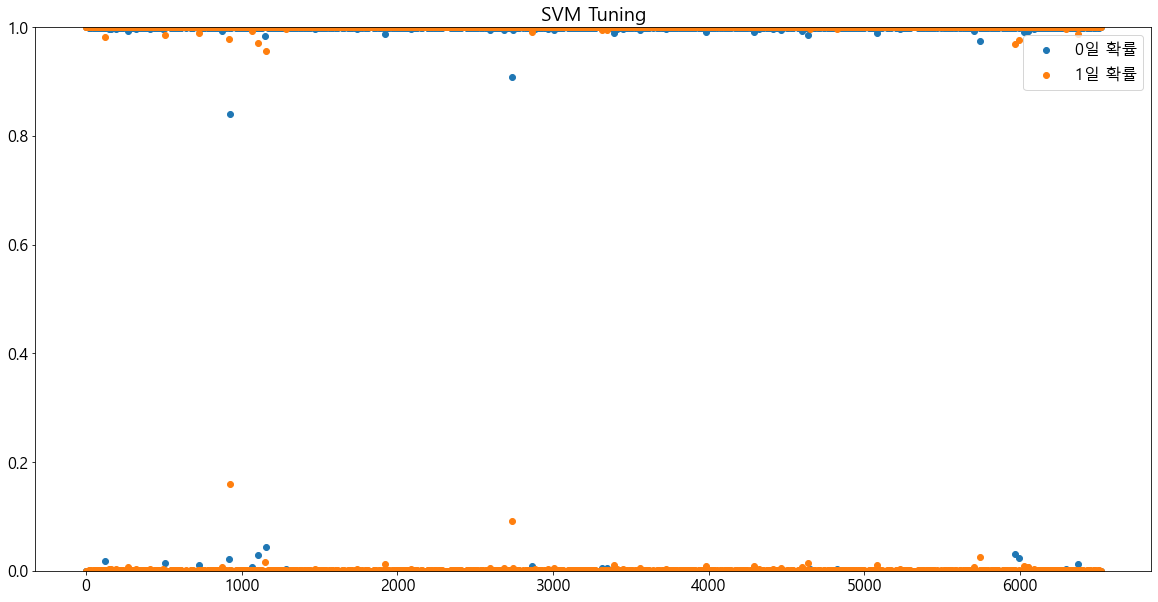

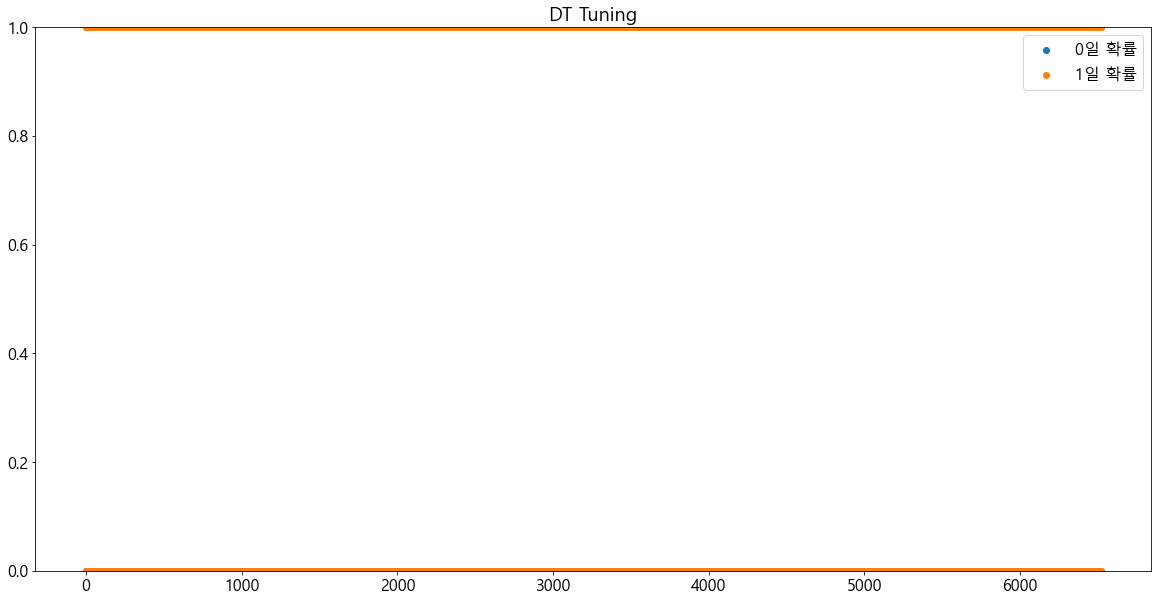

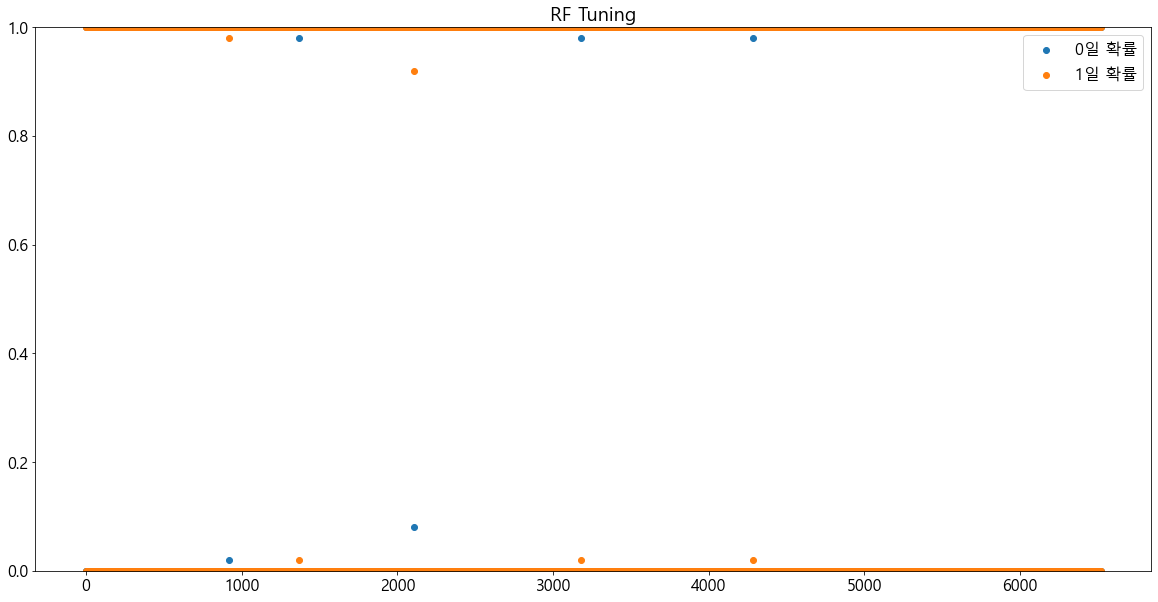

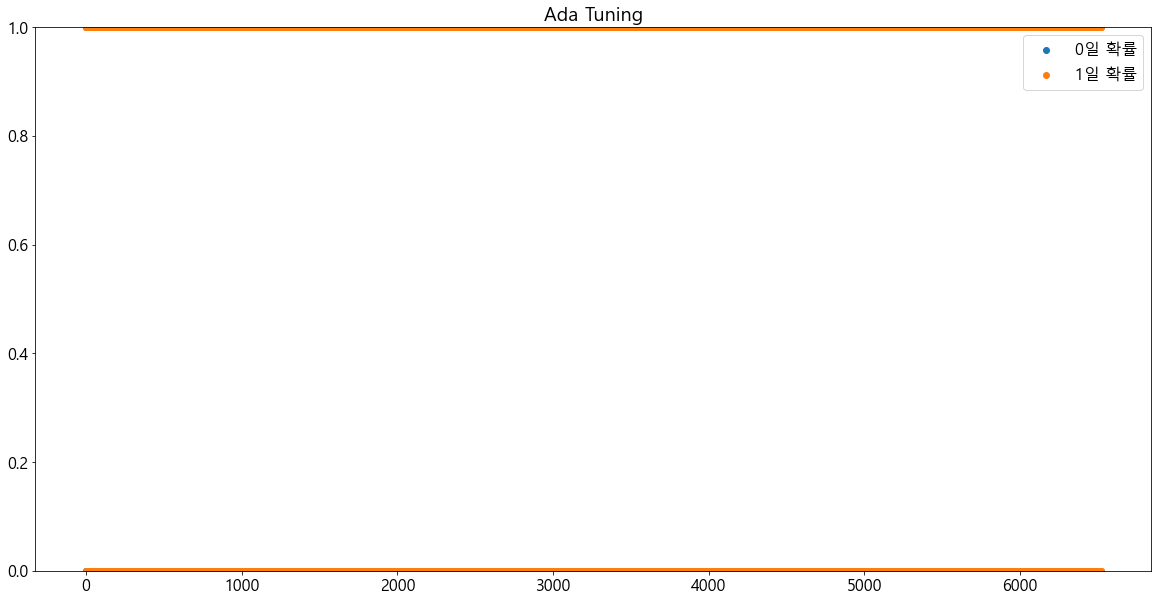

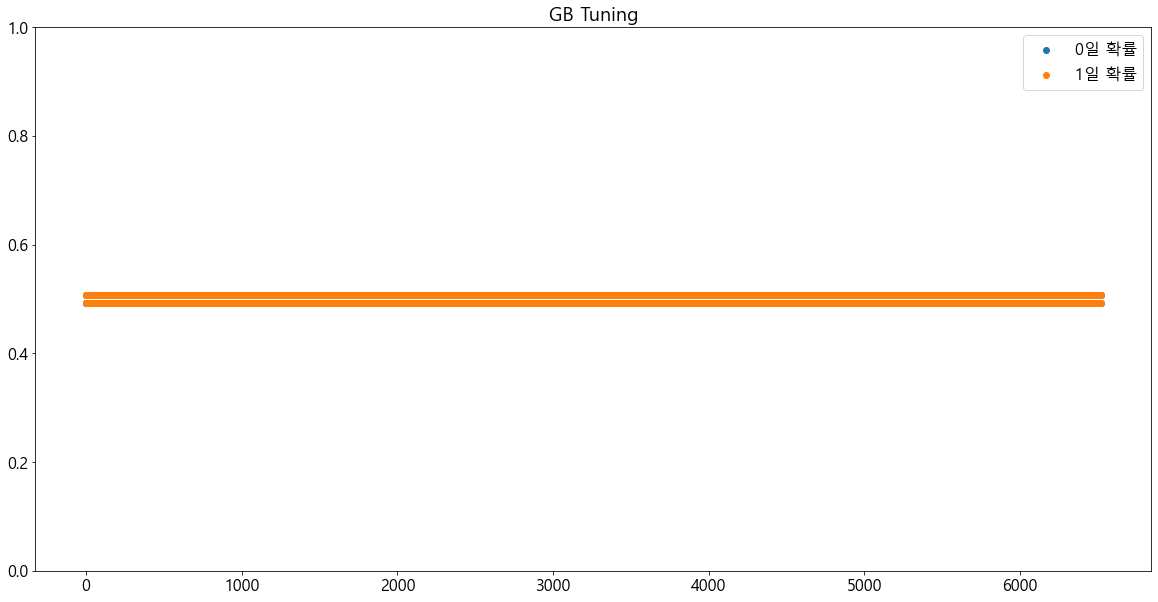

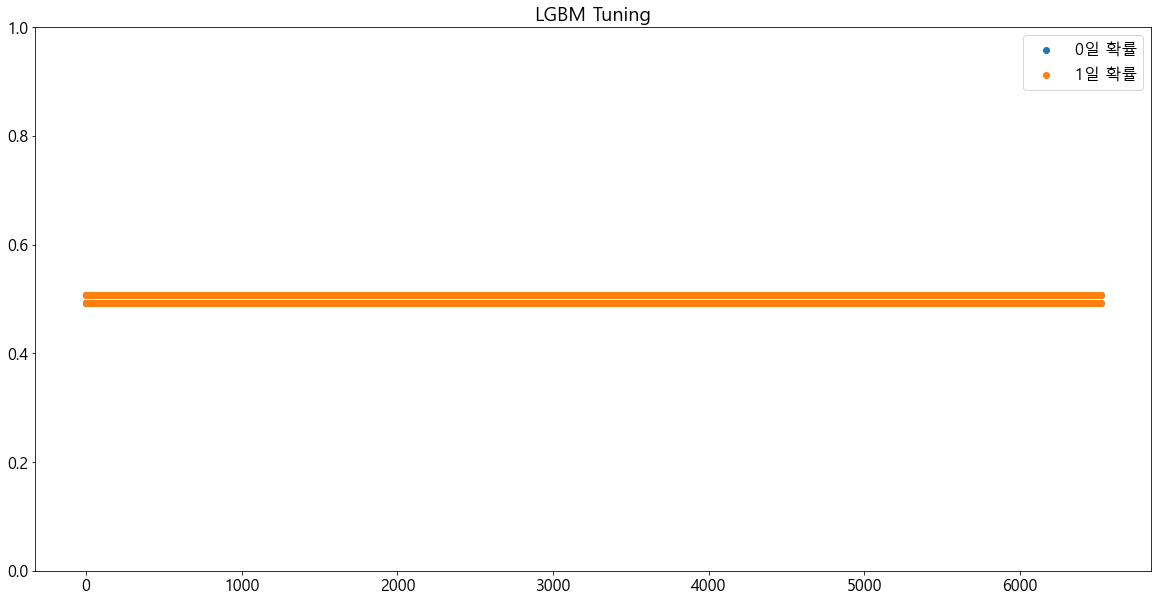

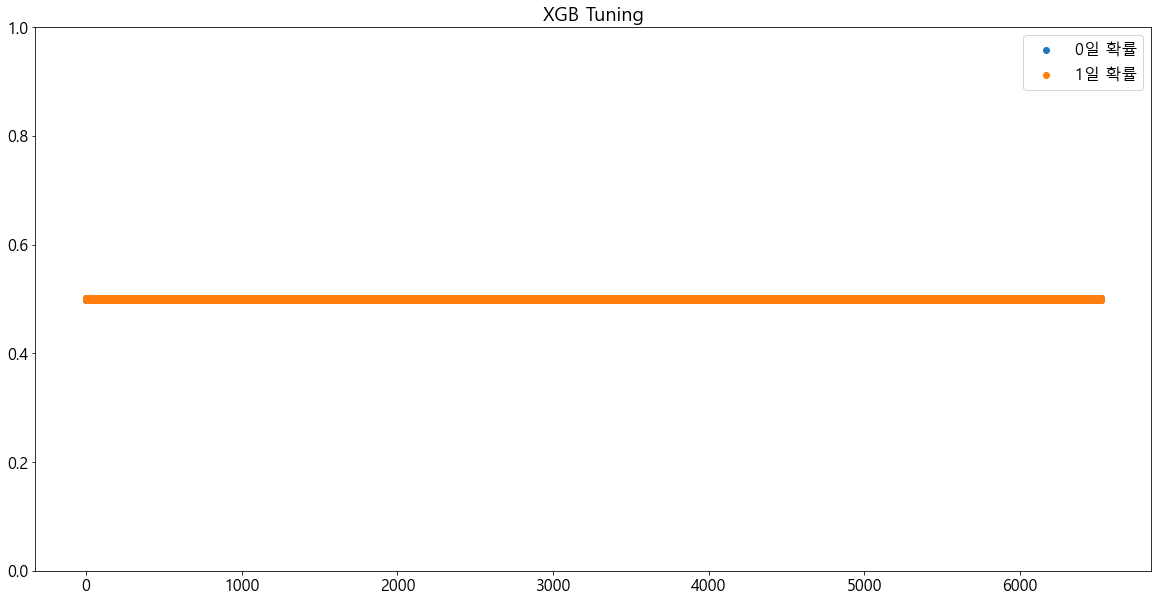

In [45]:
# 학습 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_train)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

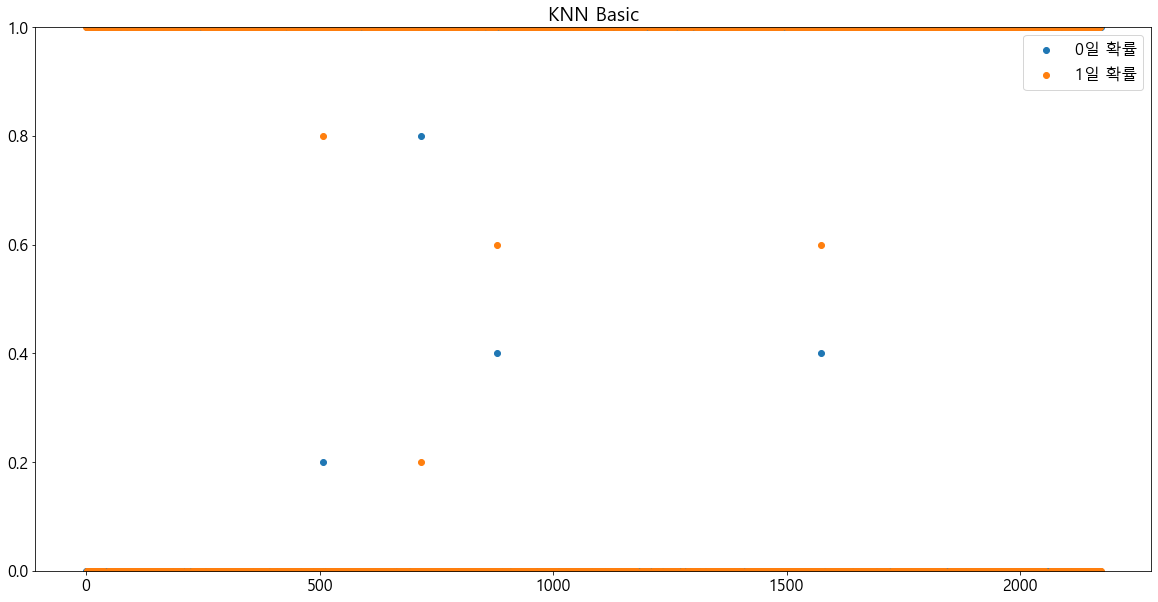

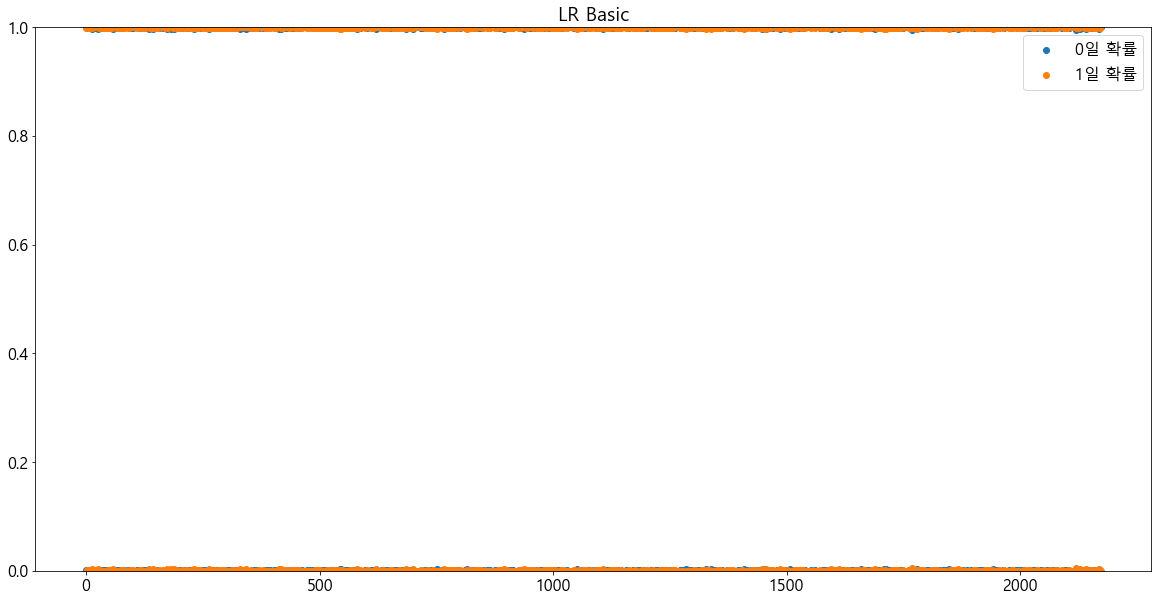

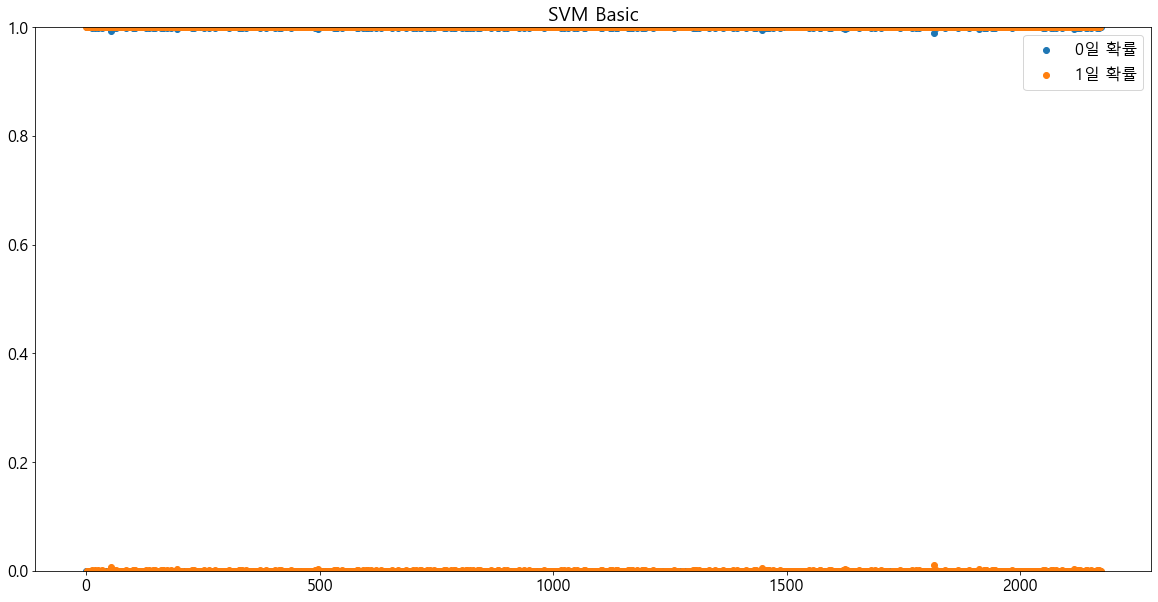

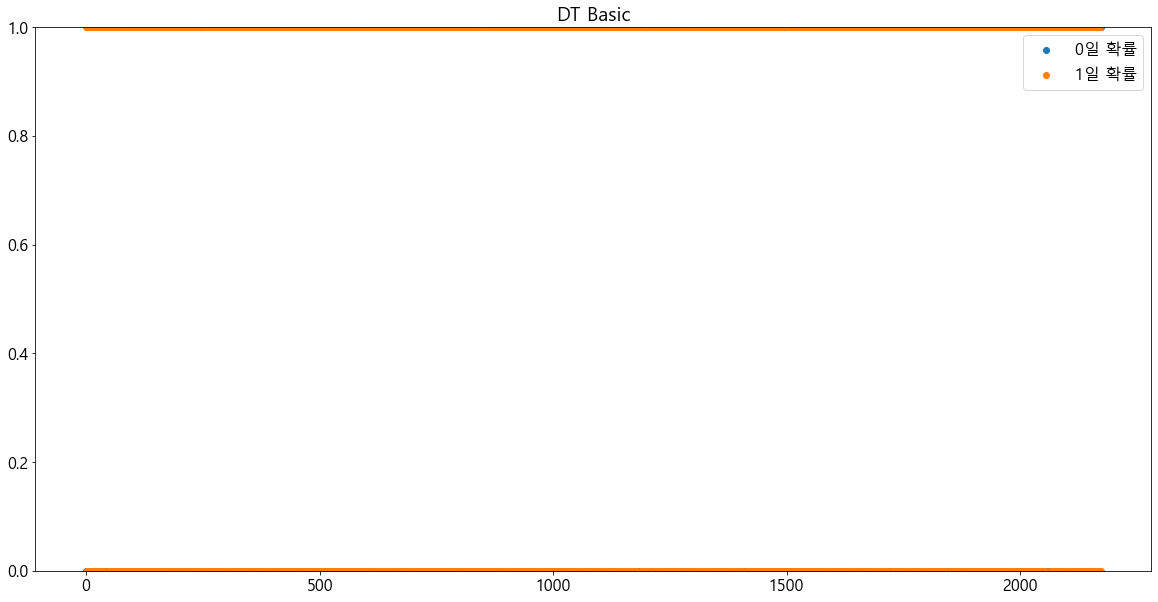

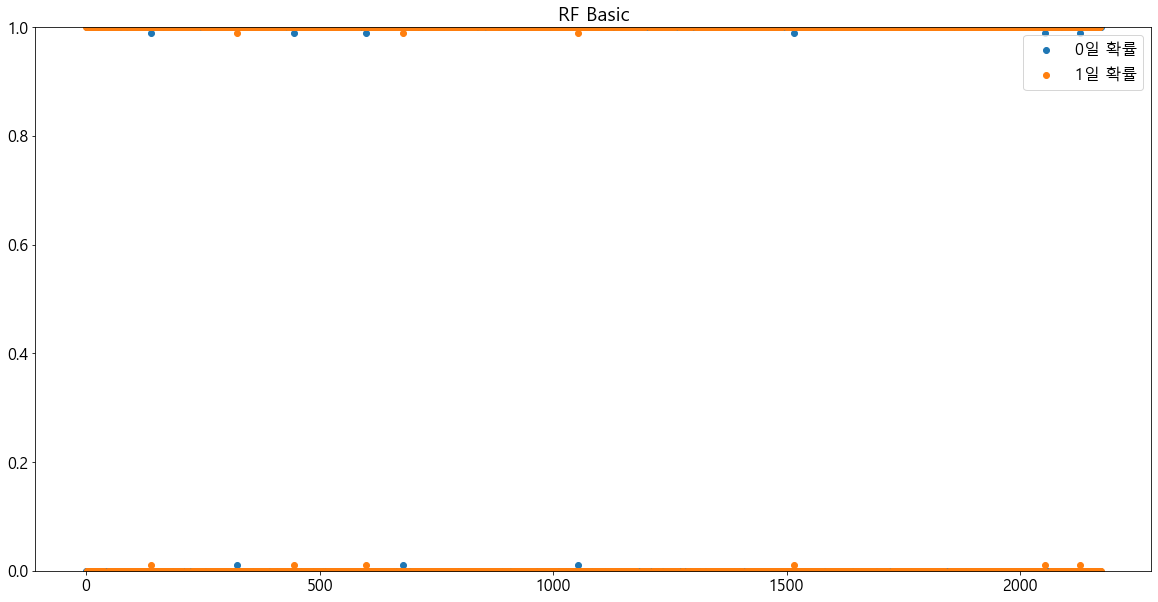

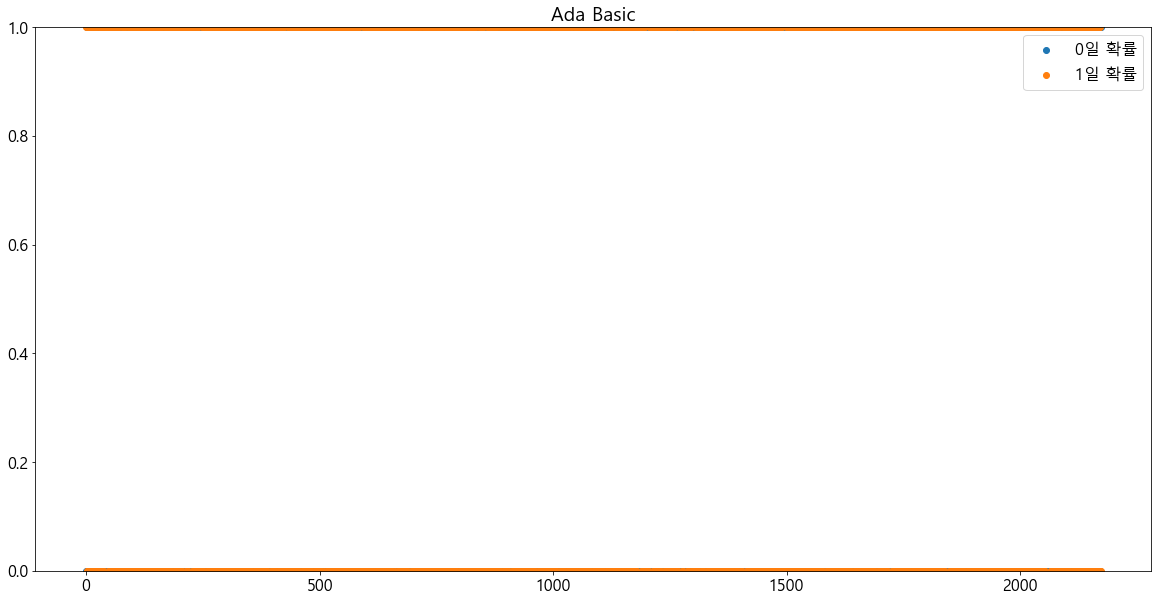

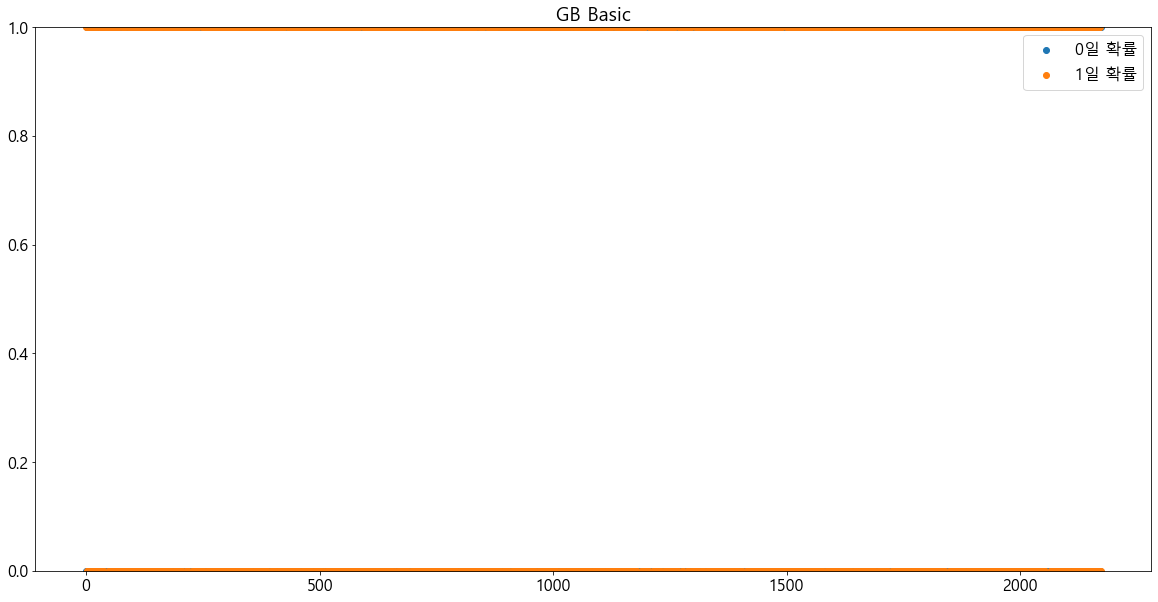

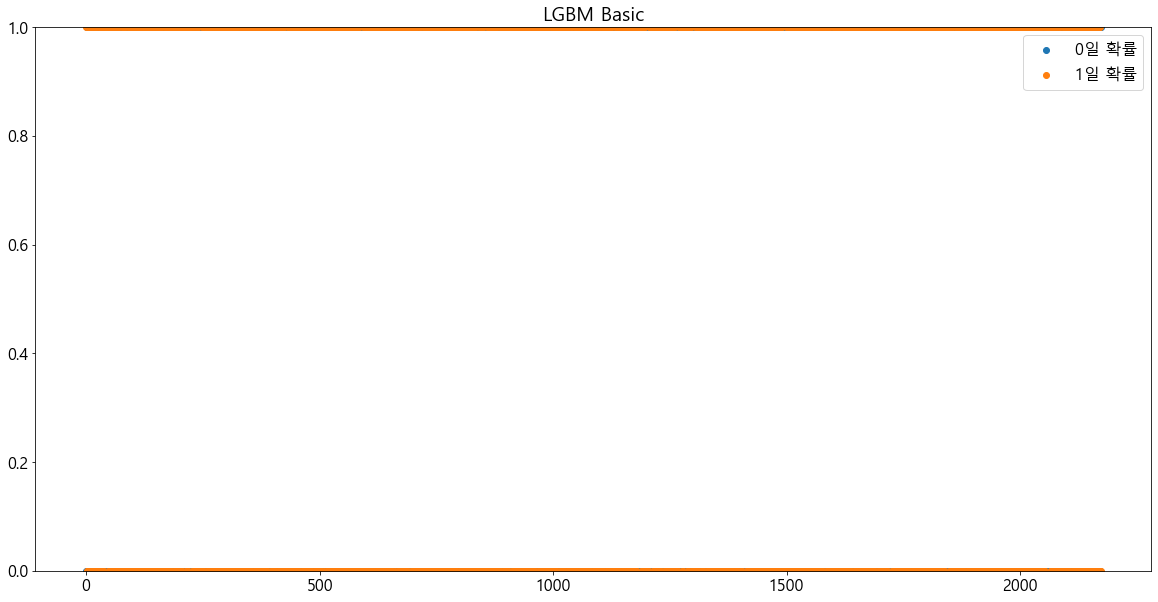

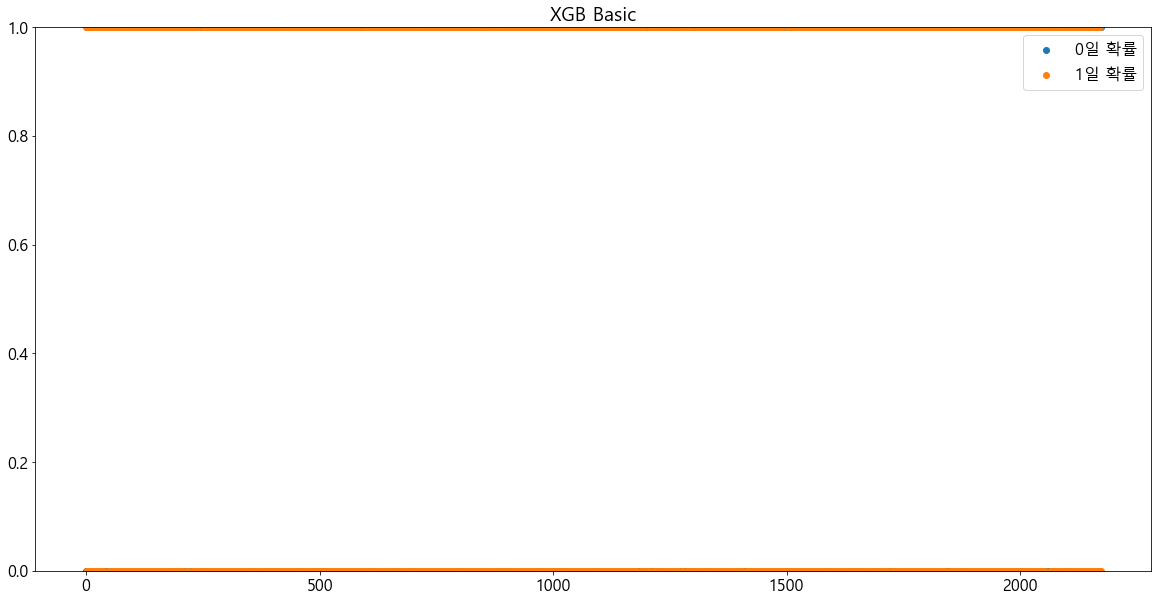

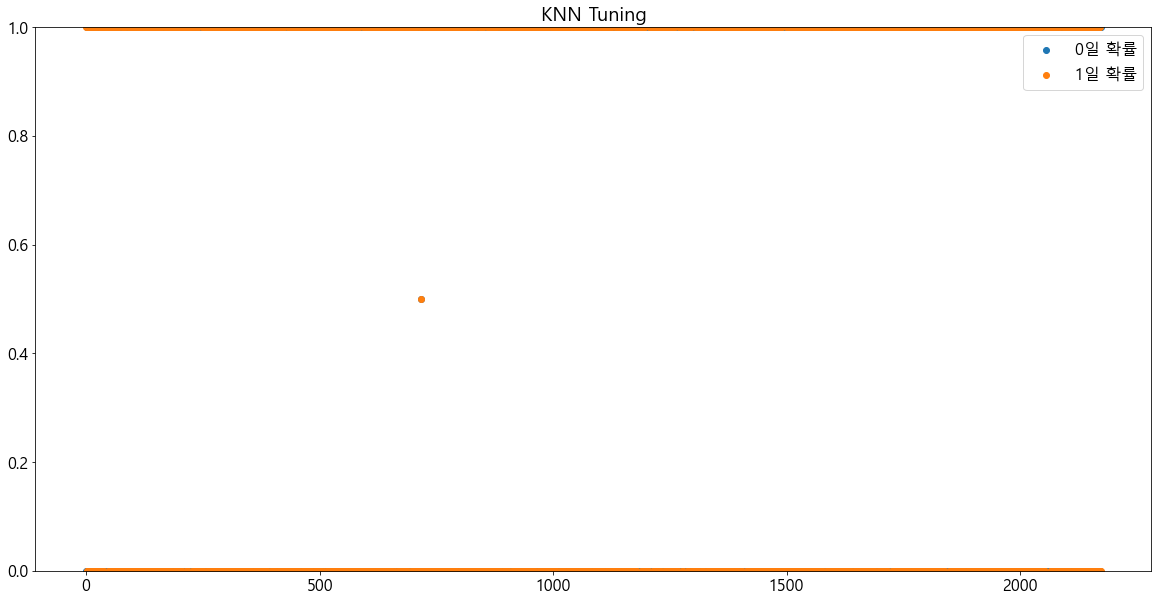

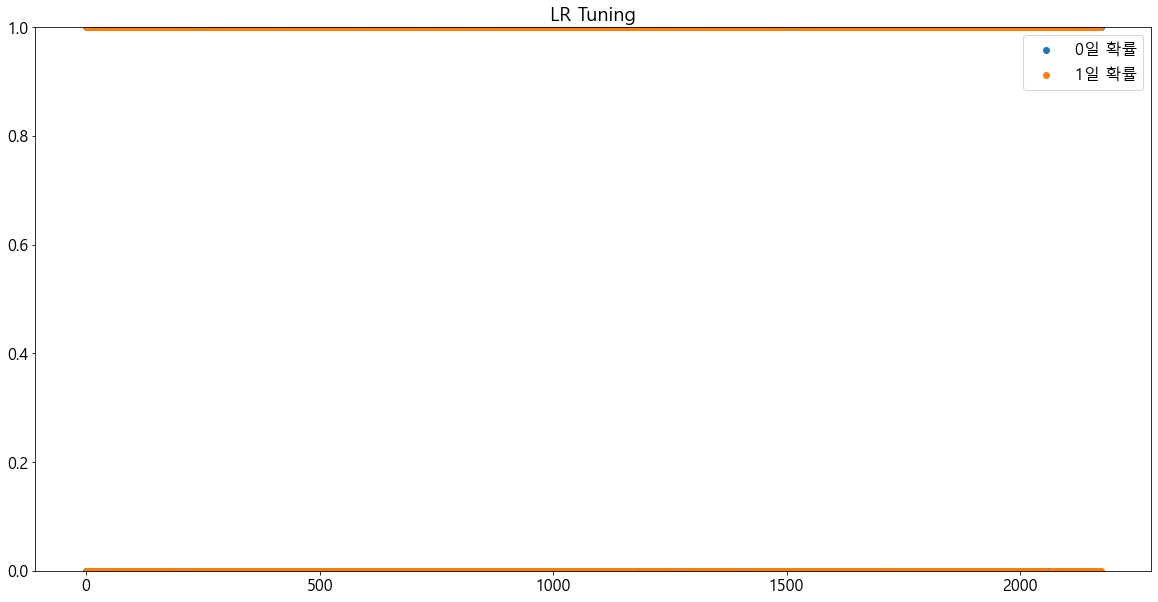

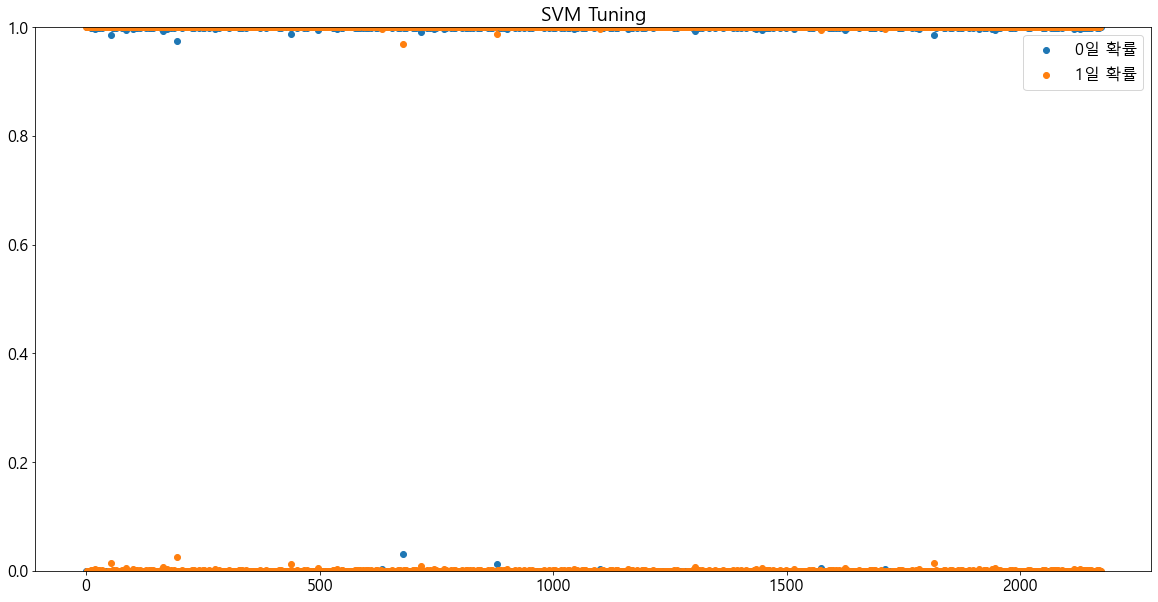

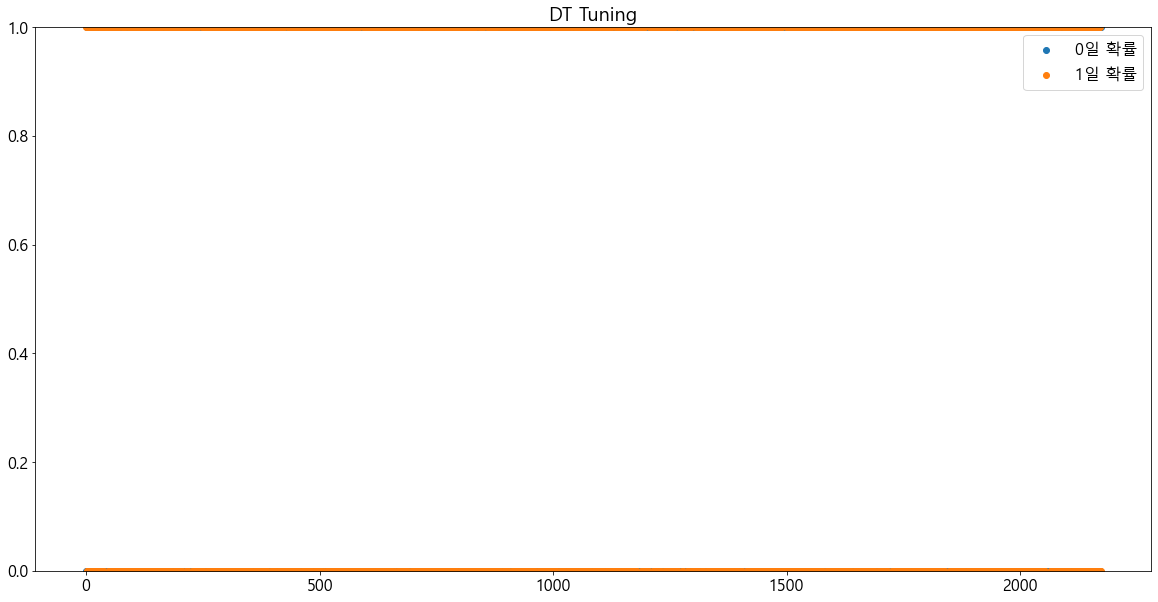

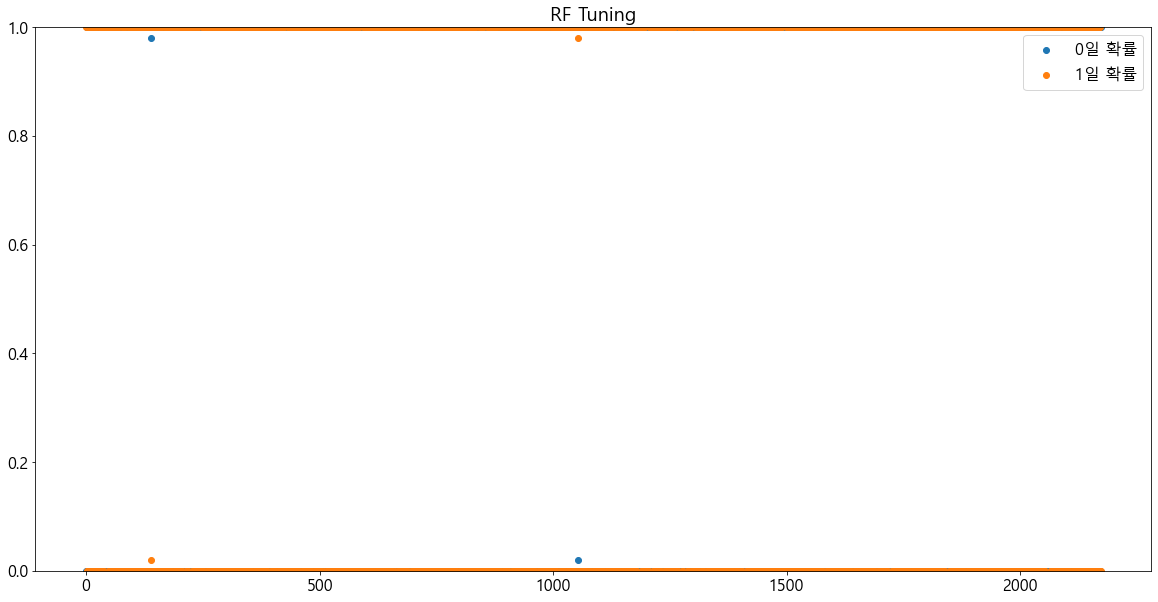

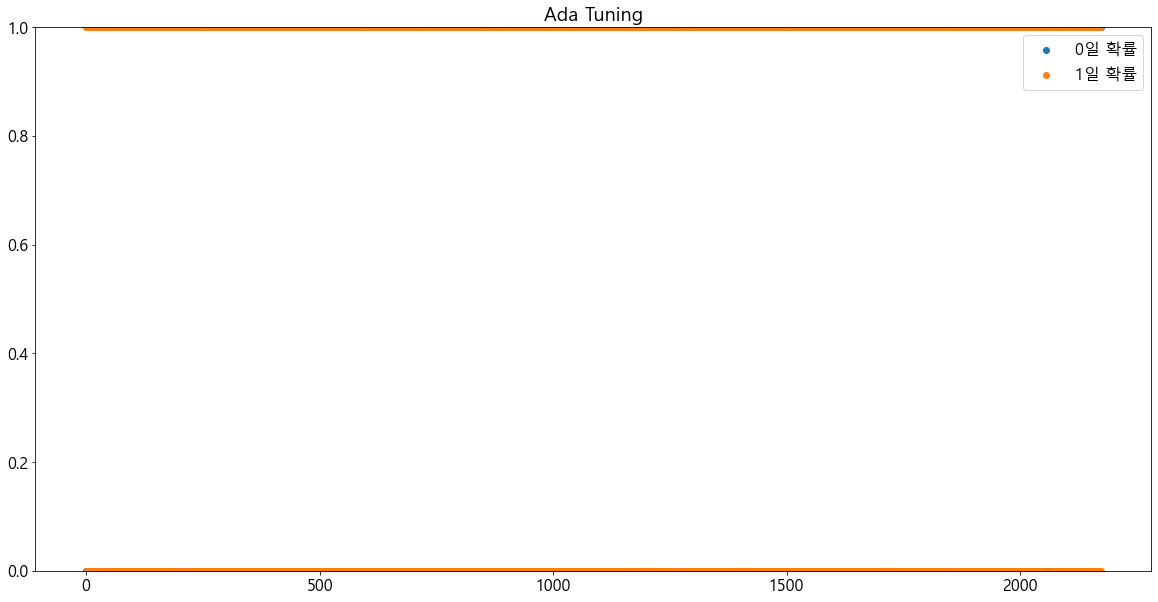

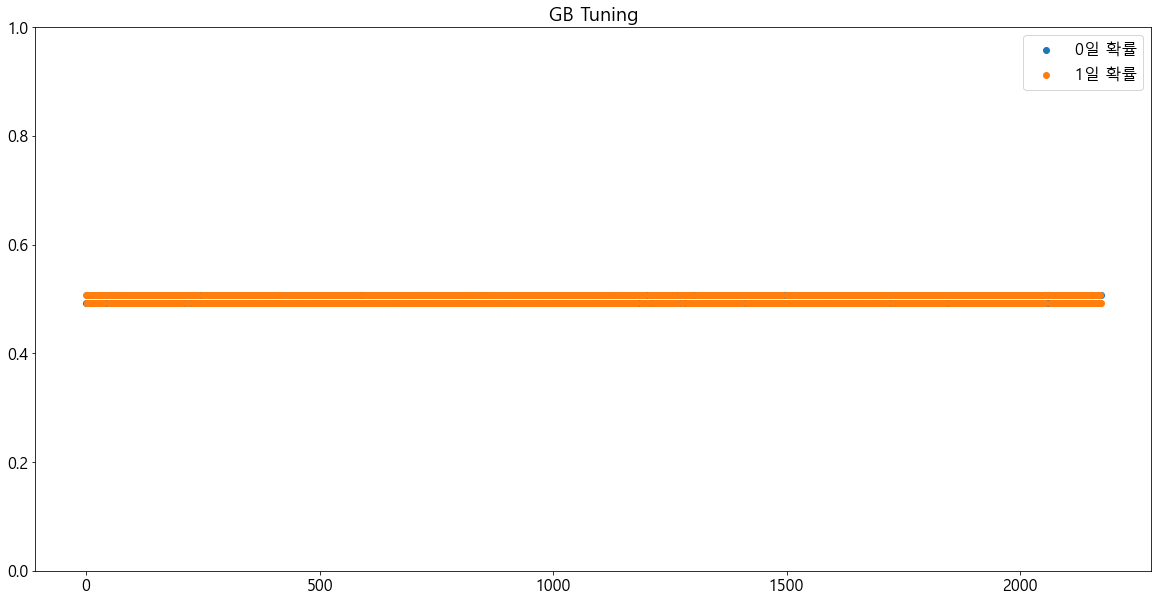

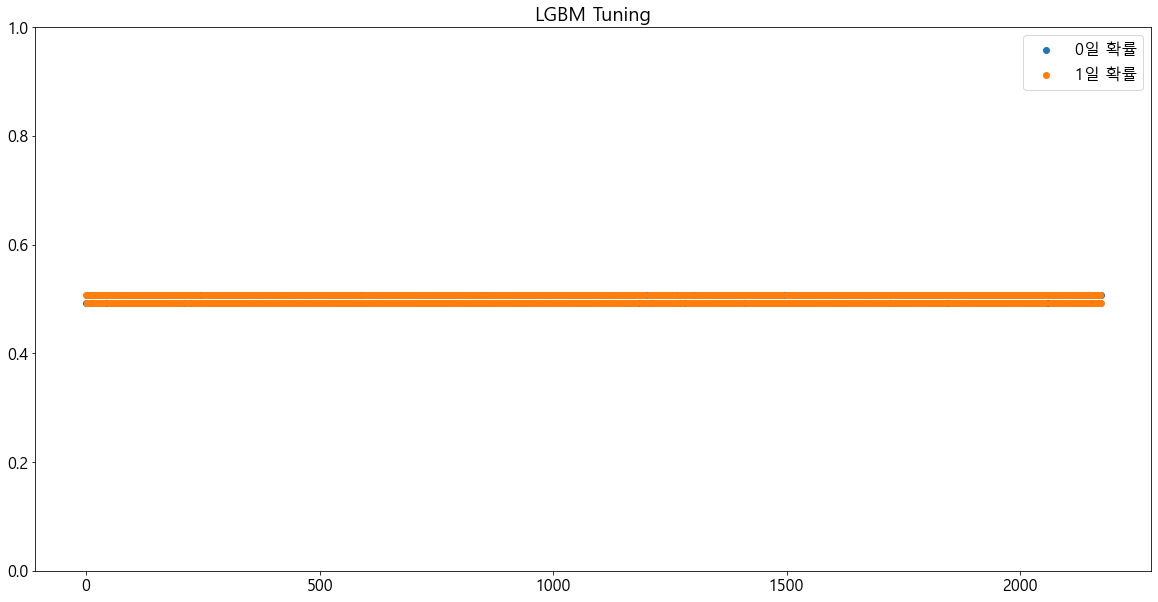

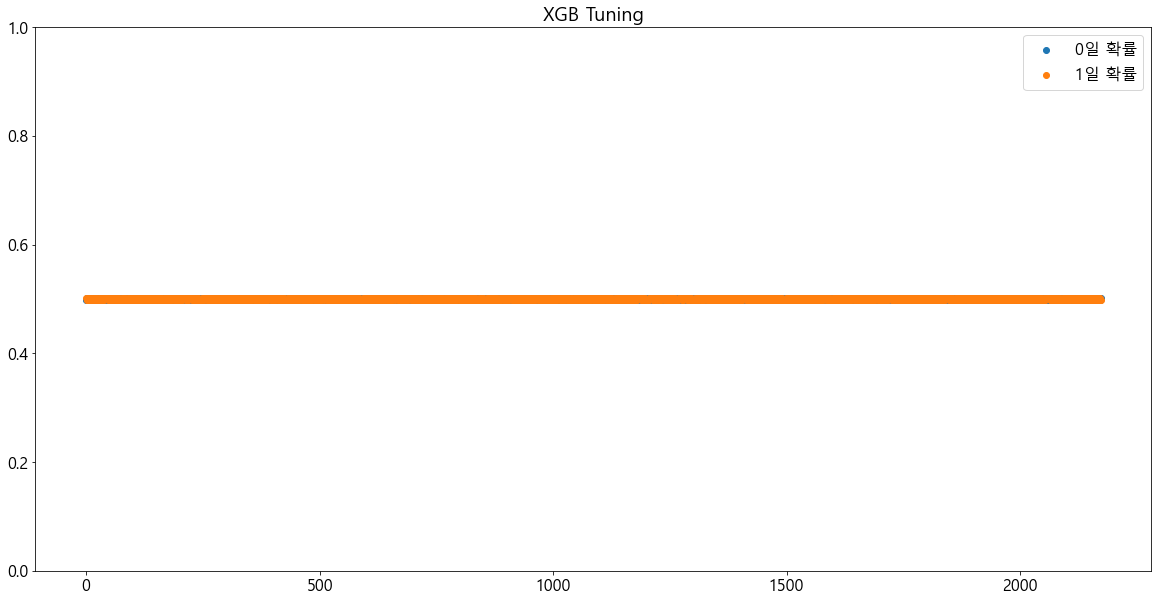

In [46]:
# 검증 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_test)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

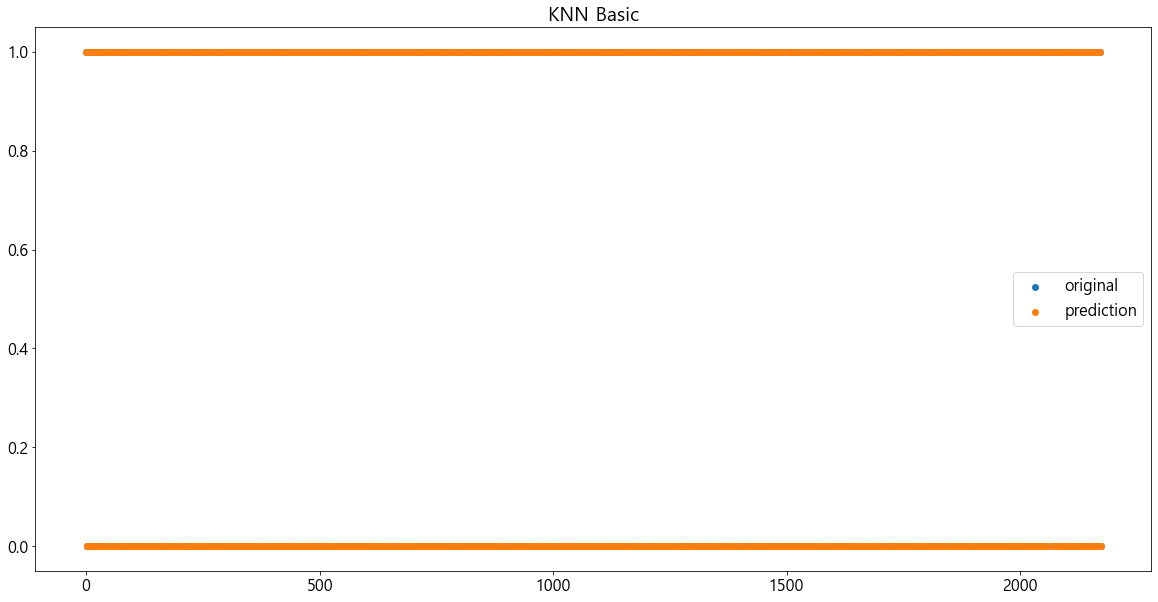

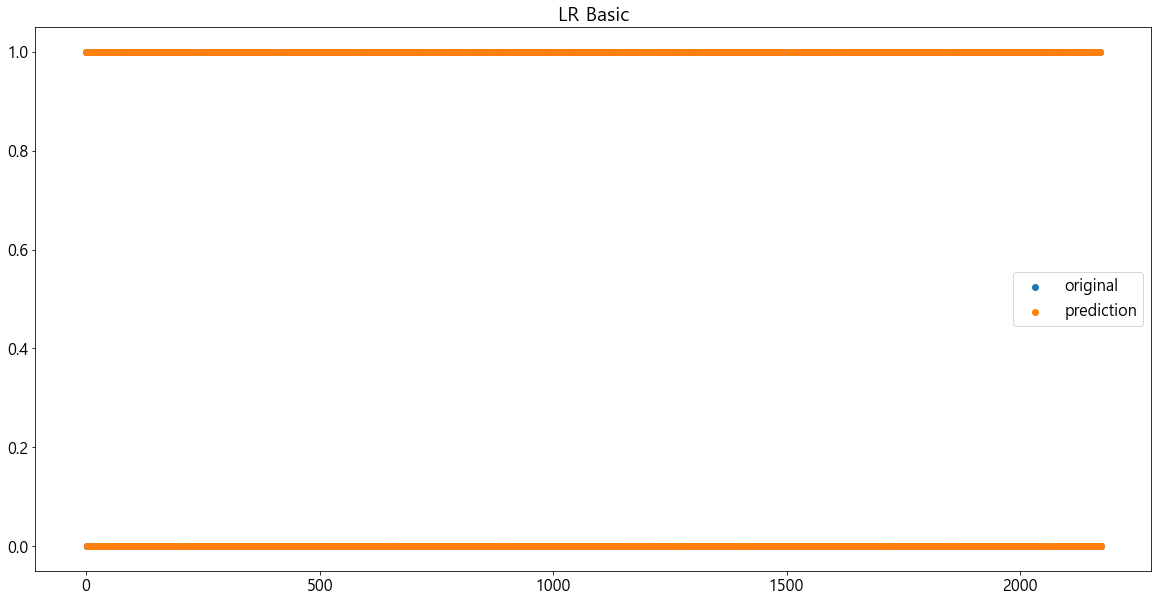

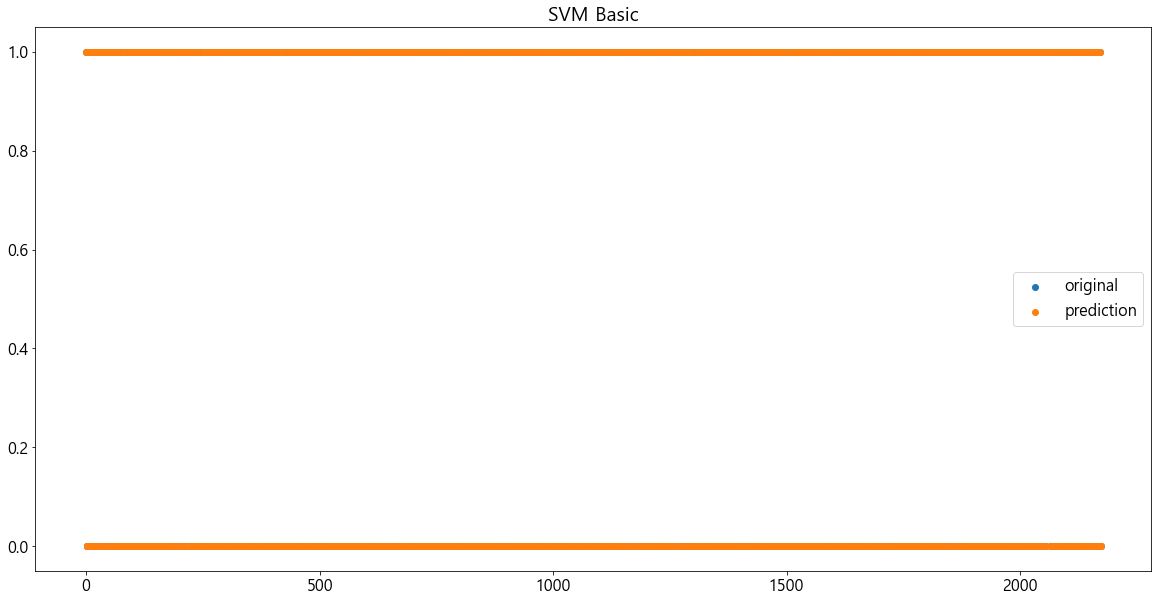

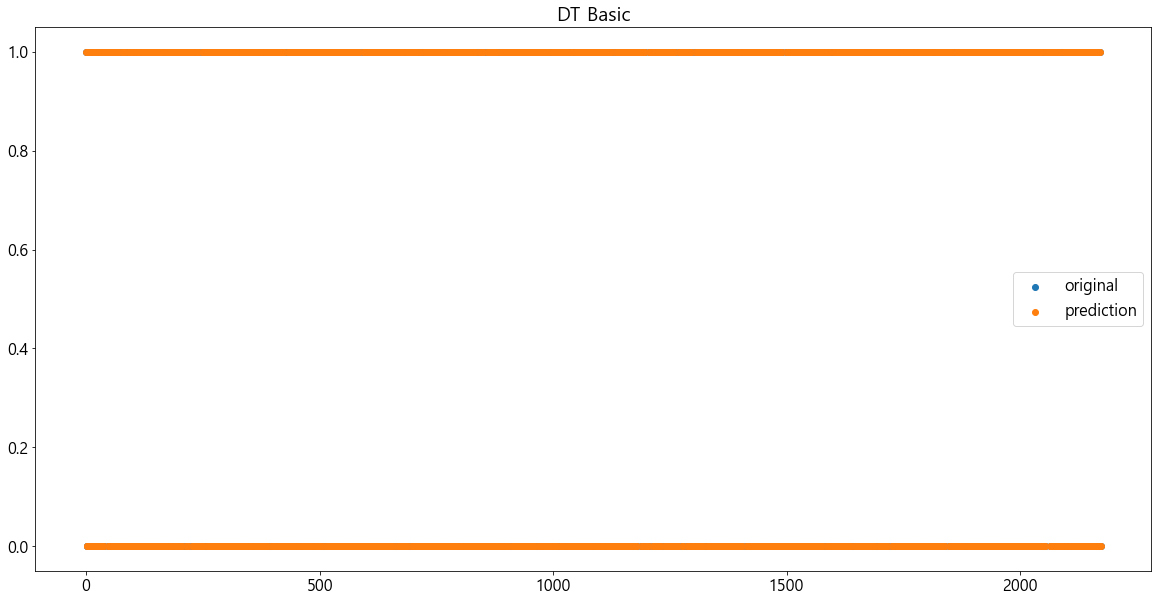

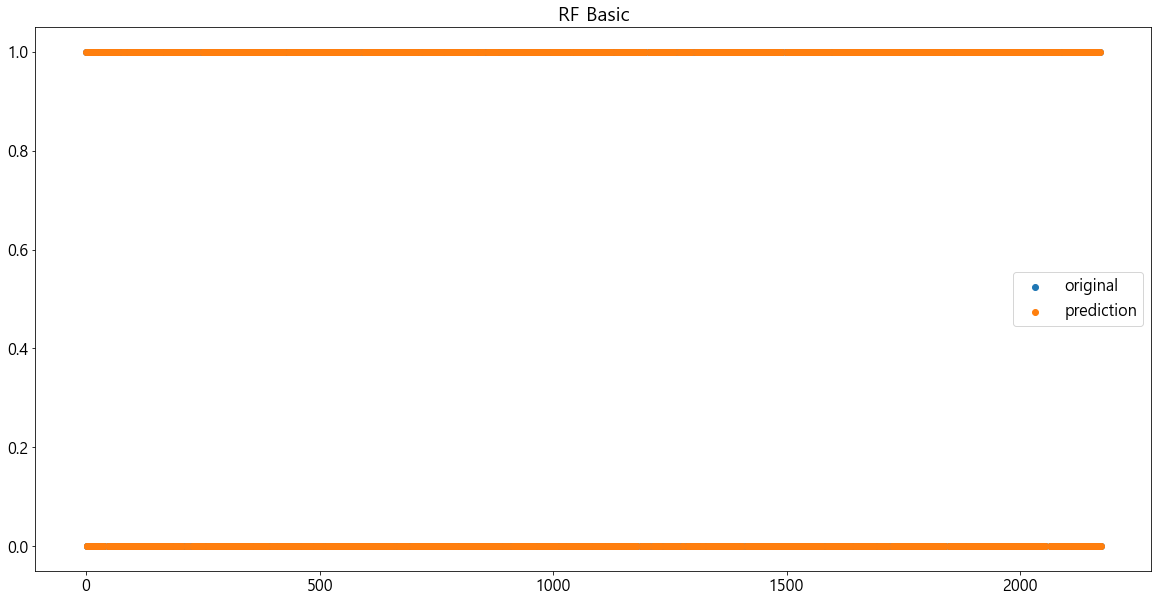

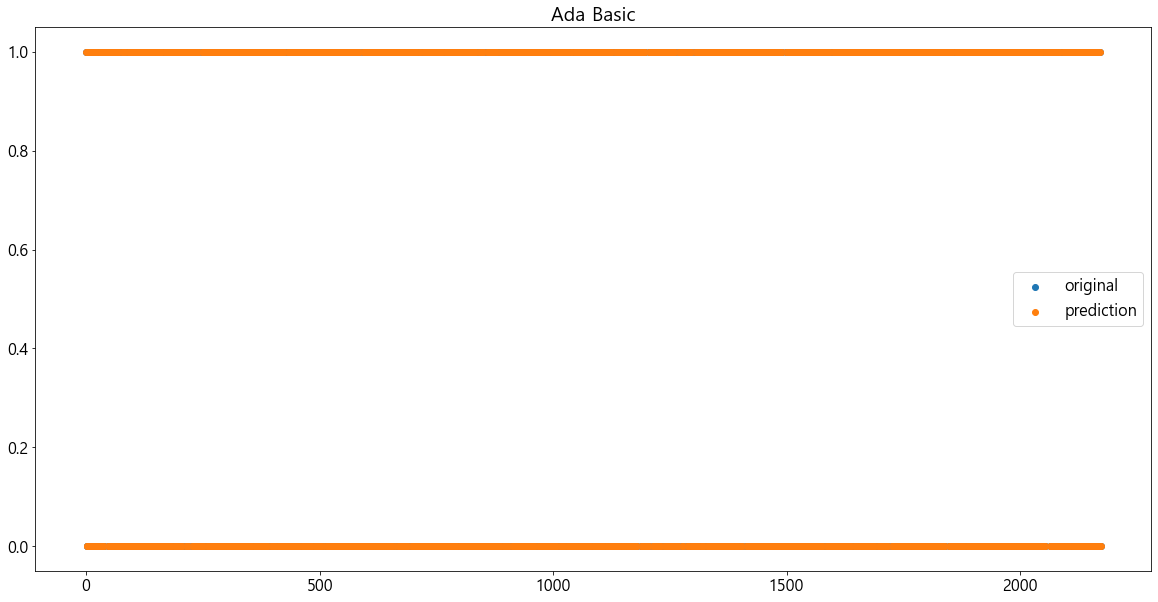

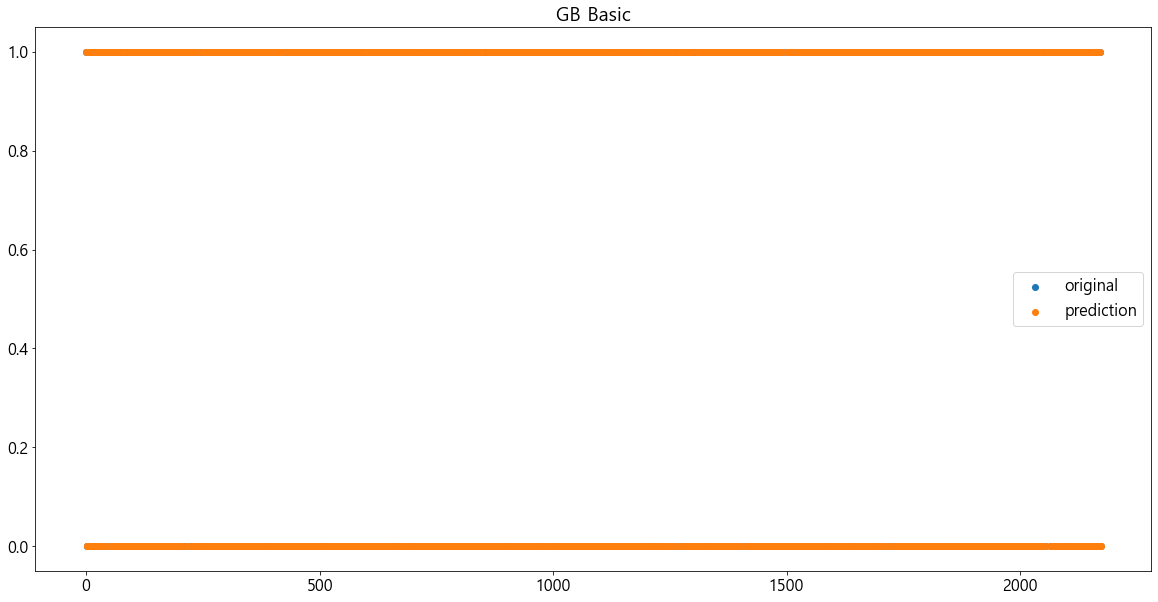

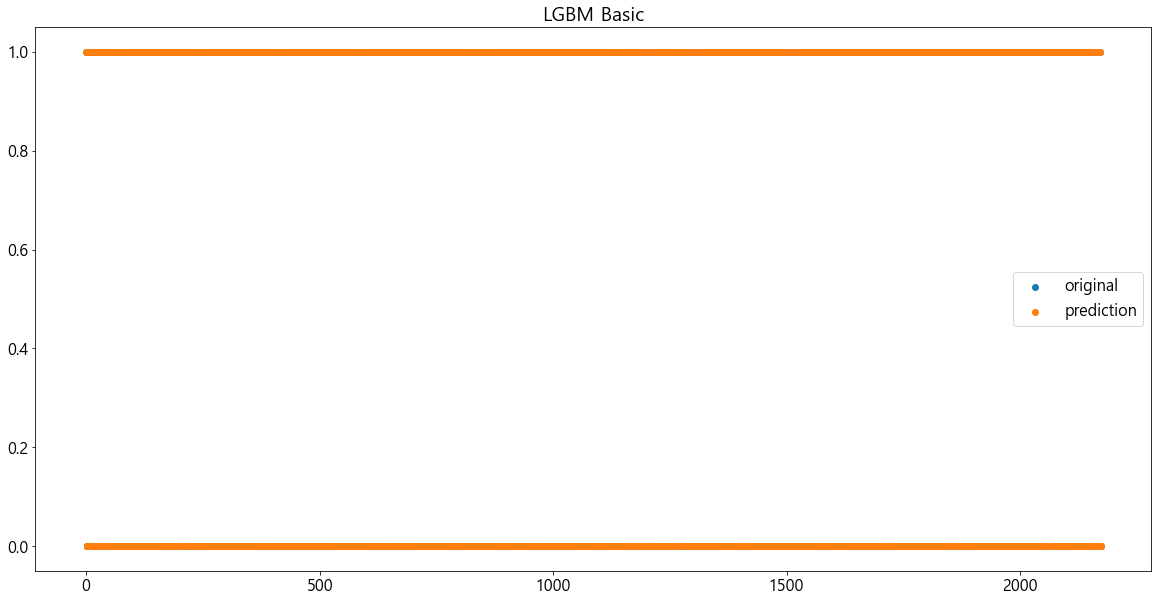

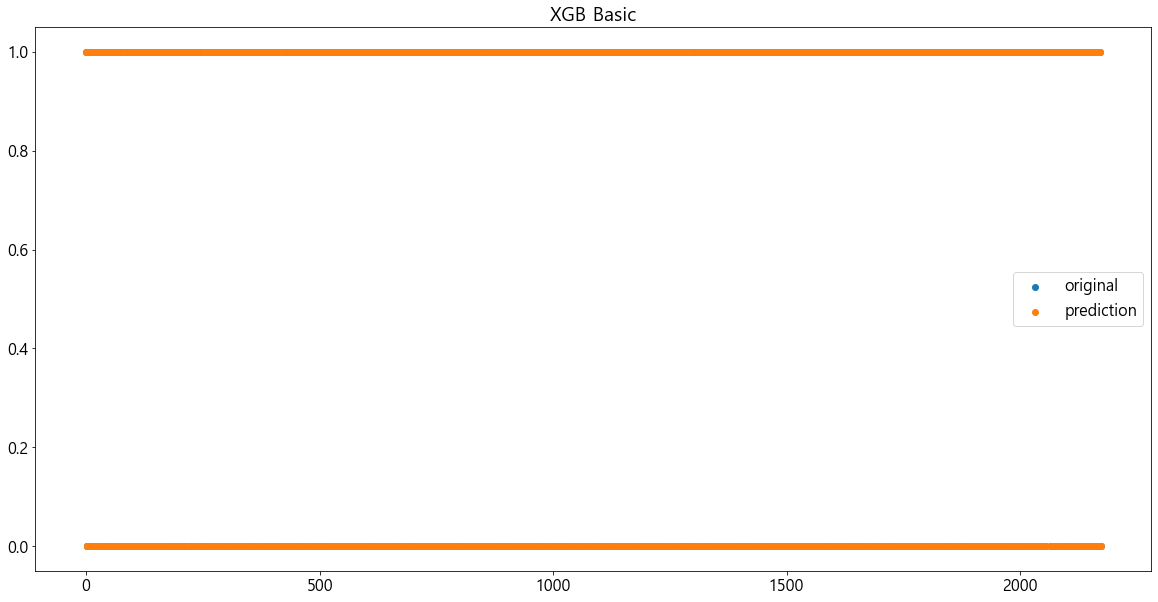

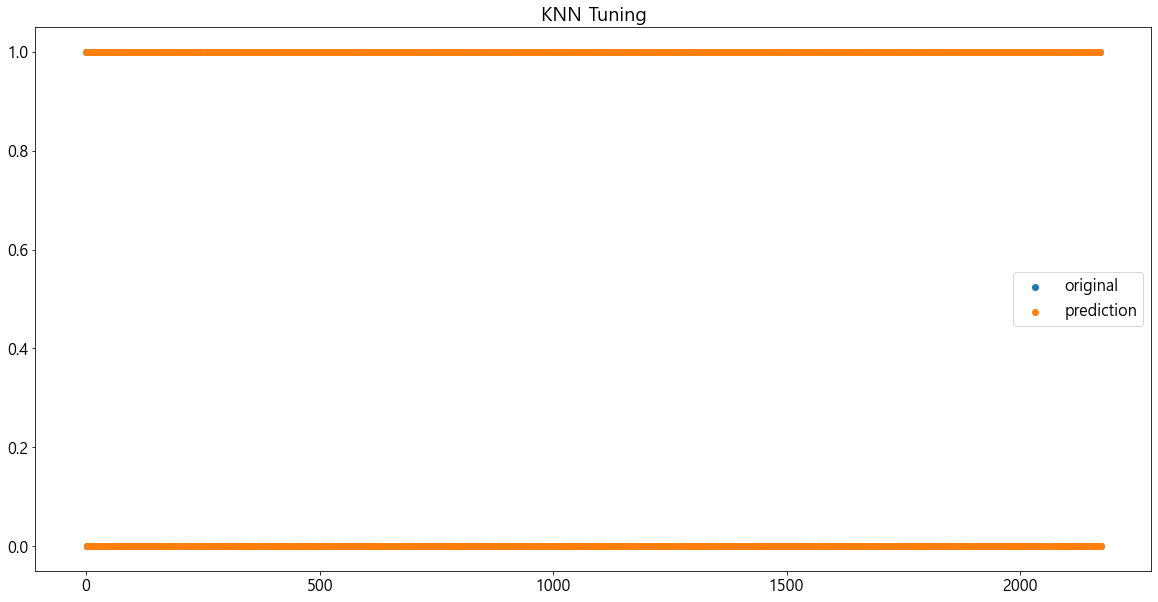

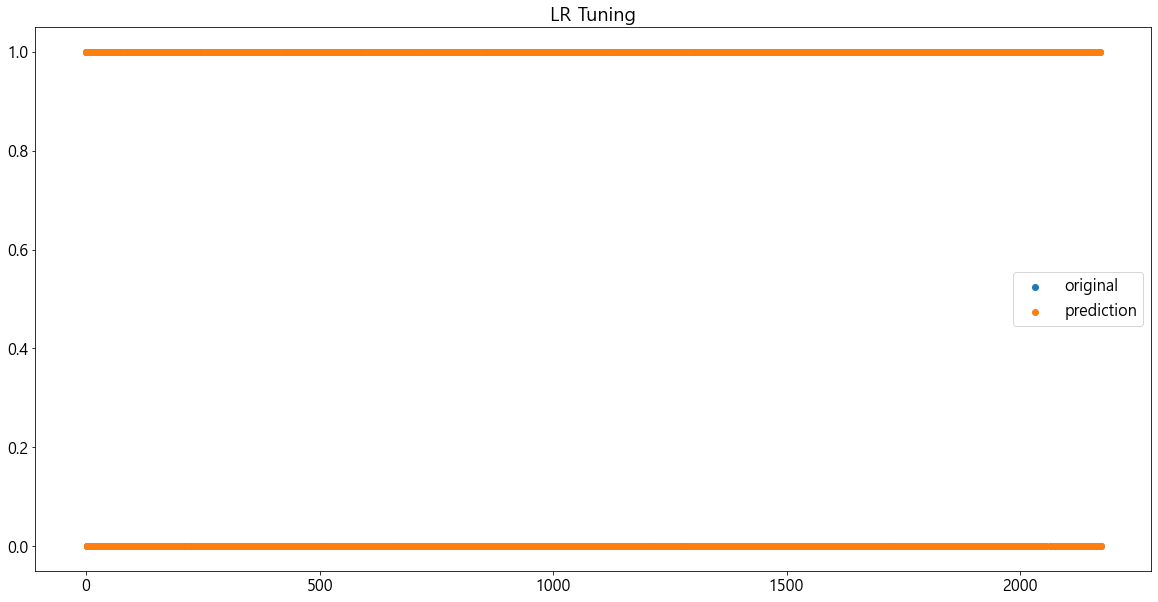

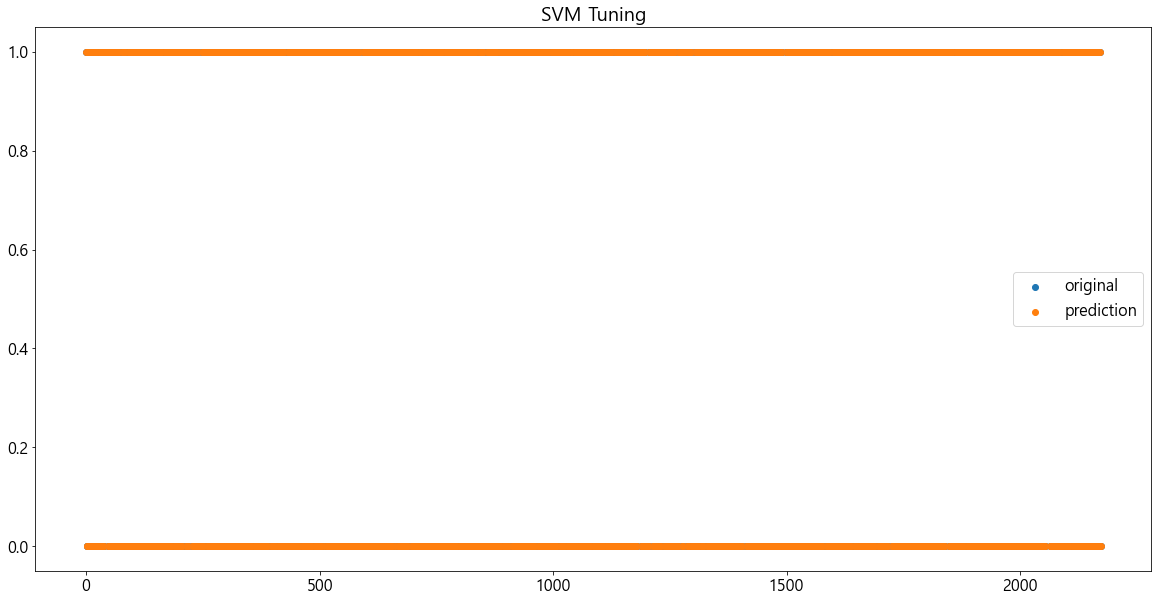

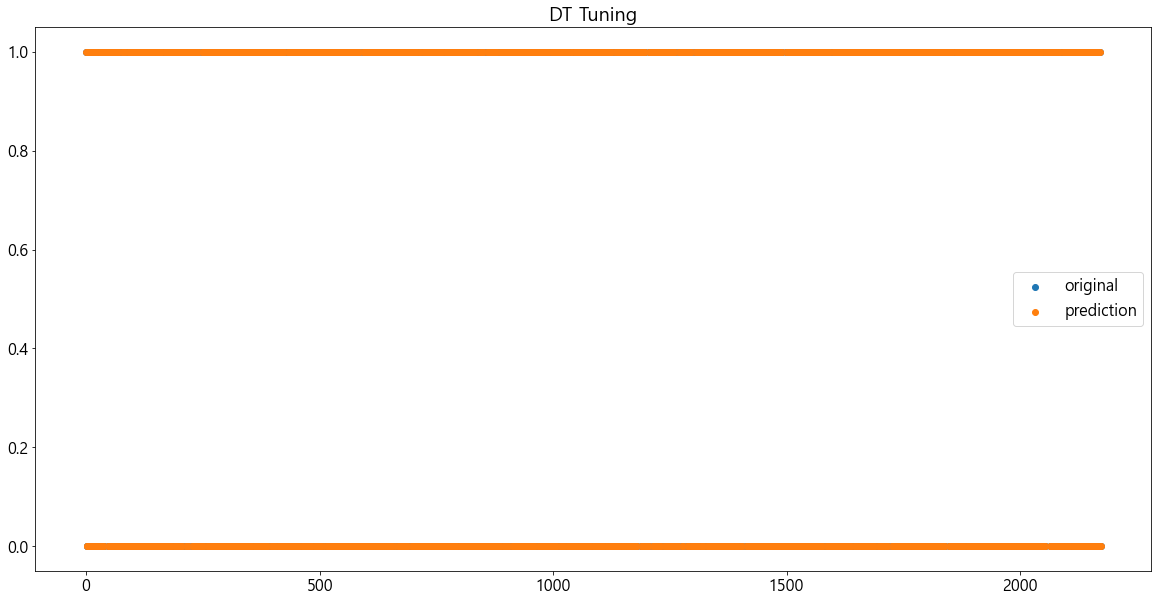

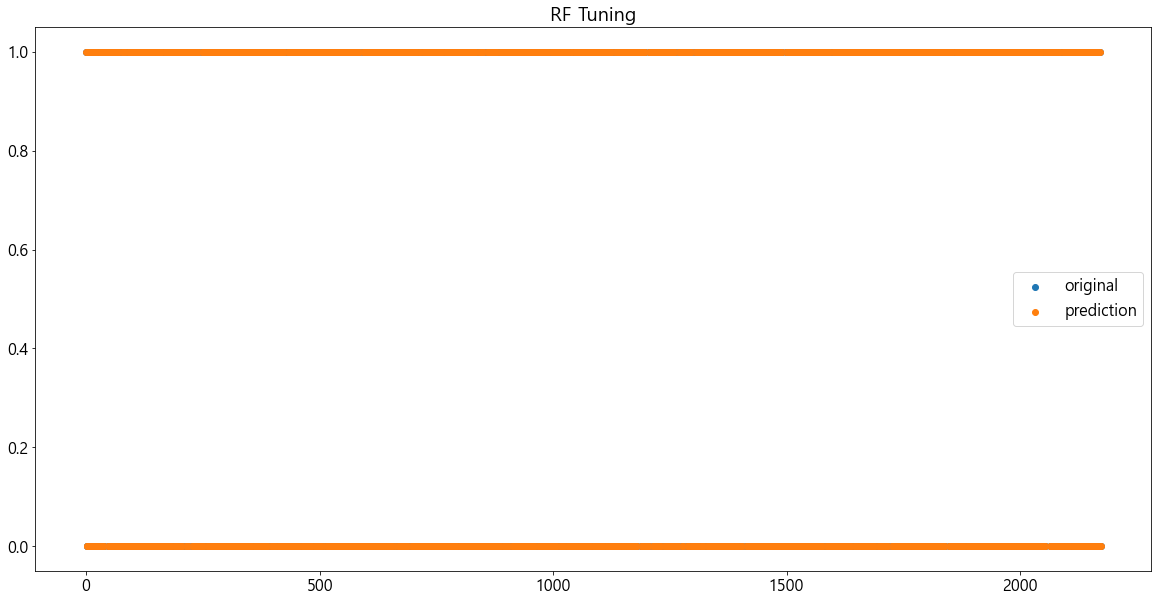

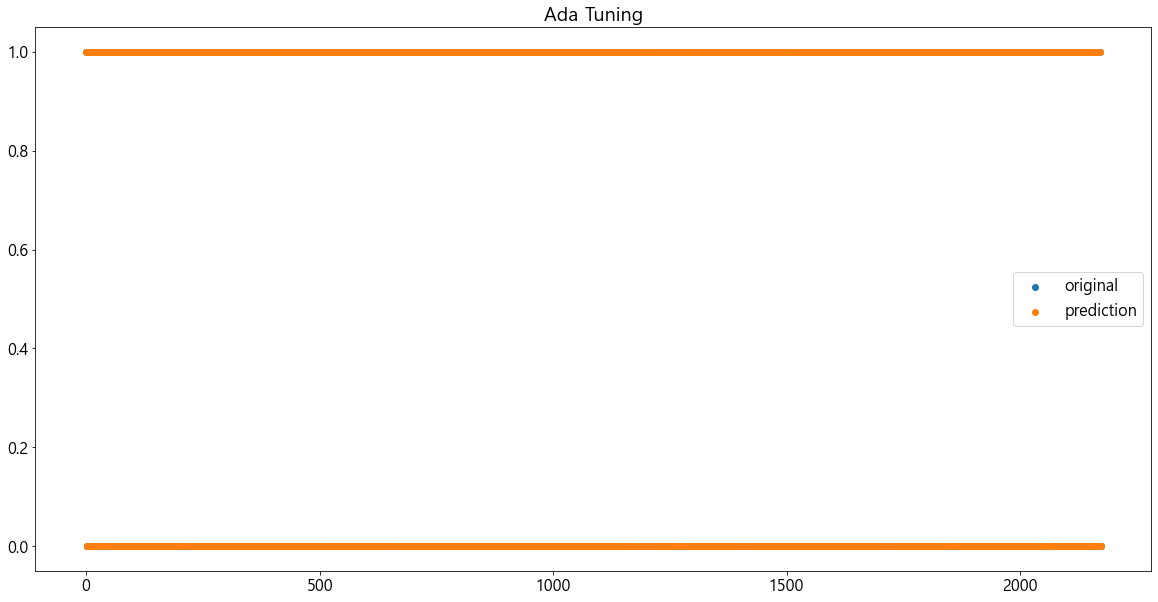

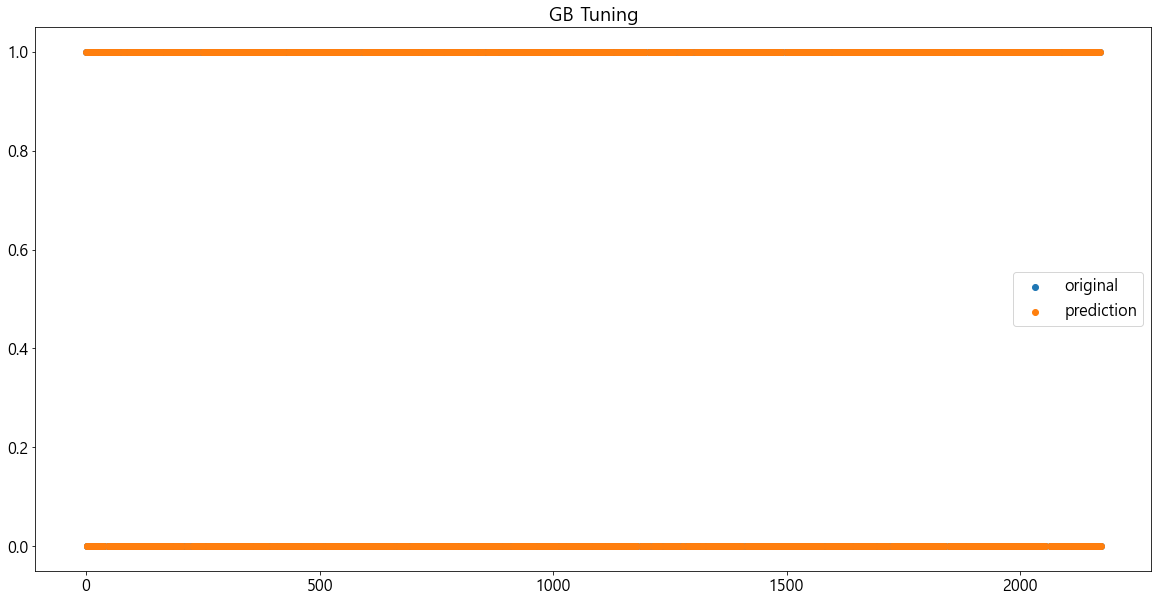

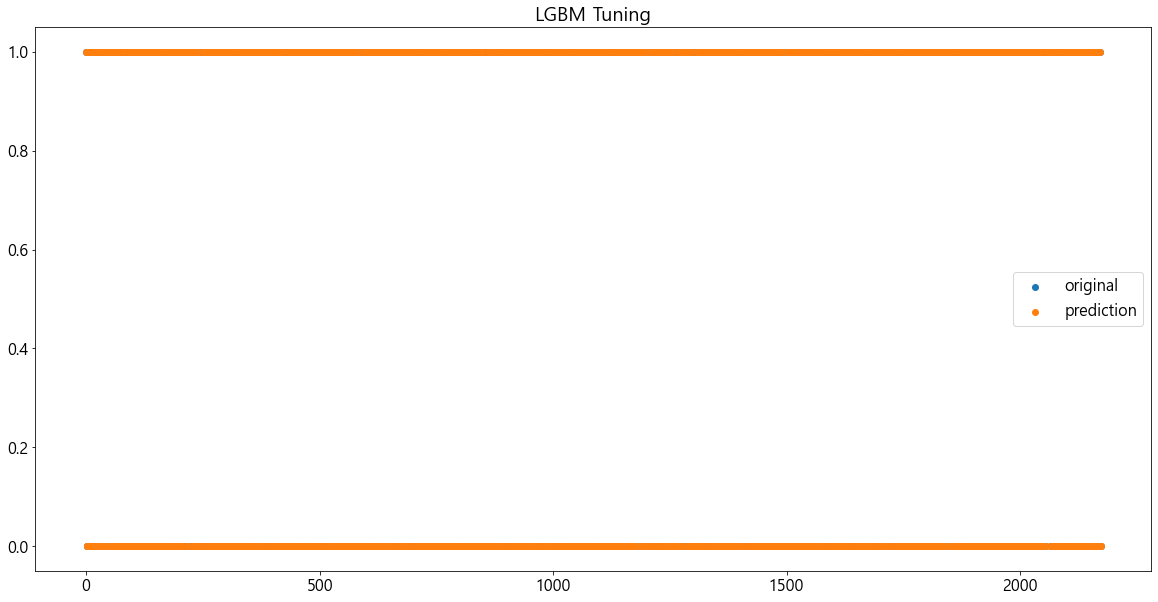

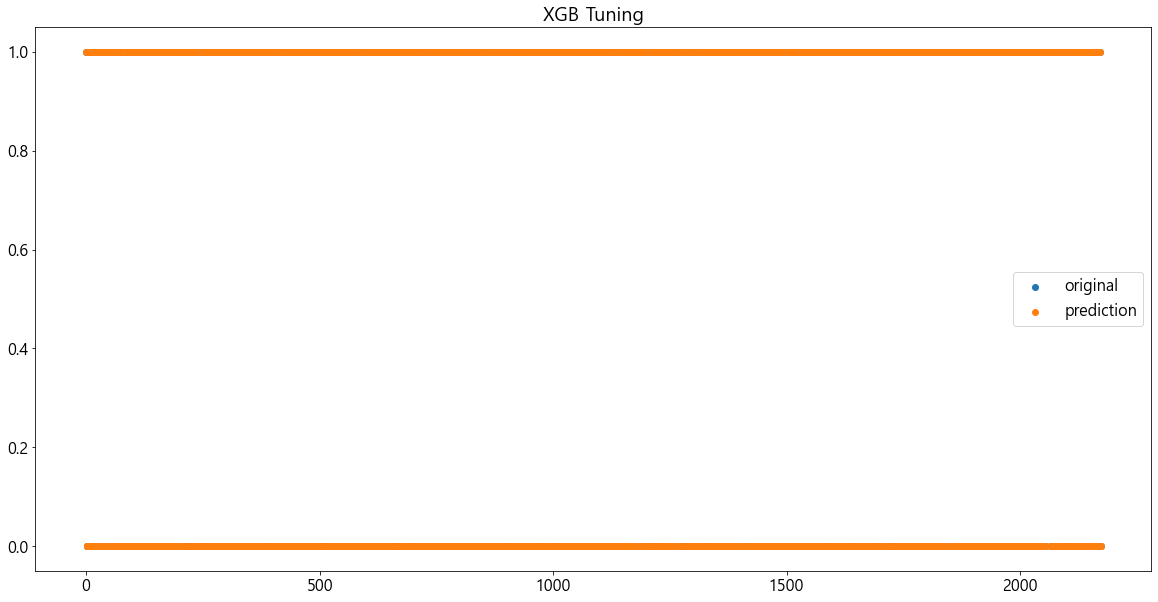

In [47]:
# 예측 결과와 진짜 결과의 패턴을 시각화
for idx, pred in enumerate(pred_list) :
    plt.scatter(list(range(len(y_test))), y_test, label='original')
    plt.scatter(list(range(len(pred))), pred, label='prediction')
    plt.title(result_name[idx])
    plt.legend()
    plt.show()

모든 모델이 성능이 매우 뛰어나나 확률 그래프와 다른 그래프들을 종합했을 때 몇 가지가 선정되고 그중에 LogisticRegression Tuning 모델을 사용하겠다.

### 선정된 모델에 전체 데이터를 학습시킨다.

In [49]:
best_model = tuning_model[1]

best_model.fit(X, y)

LogisticRegression(C=0.0001, penalty='none', random_state=1)

### 예측한다.

In [50]:
df20.reset_index(inplace=True, drop=True)
df20

,HomePlanet,CryoSleep,Destination,VIP,Deck,CabinSide,Age2,RoomService2,FoodCourt2,ShoppingMall2,Spa2,VRDeck2,Mean,Max,Min,Diff
0,0,1,2,0,6,2,20.0,0.0,0.0,0.0,0.0,0.0,0.569396,0.817583,0.425635,0.391949
1,0,0,2,0,5,2,10.0,0.0,1.0,0.0,1.0,0.0,0.478752,0.627822,0.277464,0.350358
2,1,1,0,0,2,2,30.0,0.0,0.0,0.0,0.0,0.0,0.613390,0.817583,0.458525,0.359058
3,1,0,2,0,2,2,30.0,0.0,1.0,0.0,1.0,1.0,0.482535,0.680054,0.275415,0.404638
4,0,0,2,0,5,2,20.0,1.0,0.0,1.0,0.0,0.0,0.469739,0.634465,0.259966,0.374499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,0,6,2,30.0,0.0,0.0,0.0,0.0,0.0,0.568321,0.817583,0.425635,0.391949
4273,0,0,2,0,6,0,40.0,0.0,1.0,1.0,1.0,1.0,0.425270,0.627822,0.275415,0.352407
4274,2,1,0,0,3,1,20.0,0.0,0.0,0.0,0.0,0.0,0.573787,0.817583,0.433054,0.384529
4275,1,0,2,0,3,1,20.0,0.0,1.0,0.0,0.0,1.0,0.484129,0.660037,0.275415,0.384622


In [51]:
# 표준화
X = scaler1.transform(df20)
X

array([[-0.82549144,  1.35324039,  0.6149389 , ...,  0.1682318 ,
         1.05949385, -1.13012721],
       [-0.82549144, -0.73896701,  0.6149389 , ..., -0.98501947,
         0.23460381, -1.4191417 ],
       [ 0.42528239,  1.35324039, -1.85204455, ...,  0.1682318 ,
         1.24260211, -1.35868789],
       ...,
       [ 1.67605623,  1.35324039, -1.85204455, ...,  0.1682318 ,
         1.1008012 , -1.18168816],
       [ 0.42528239, -0.73896701,  0.6149389 , ..., -0.78923735,
         0.2231988 , -1.18104209],
       [-0.82549144,  1.35324039, -0.61855283, ...,  0.1682318 ,
         1.05949385, -1.13012721]])

In [52]:
# 예측한다.
y_pred1 = best_model.predict(X)

In [53]:
y_pred1

array([1., 0., 1., ..., 1., 0., 1.])

In [54]:
# 저장한다.
df2['Transported'] = y_pred1
df2.to_csv('data/space_titanic_predict.csv')